# Machine learning and Data Science Coursework (COMP4030) <br>



### Group member: 
### Justin Leuk Khen Wah (______) 
### Fam Yung Zhan (20198696)

Content of this notebook: <br>
1) Download dependencies and import libraries <br><br>
2) Import csv file <br>

3.1) Exploratory Data Analysis (Justin's code) <br>
- Basic EDA <br>
- Convert to object <br>
- Find unique value in each feature <br>
- Visualise the distribution <br>
- Finding NULL values <br>
- Visualise the distribution of NULL values <br>
- Check if null values is missing at random using Heatmap <br><br>


3.2) Exploratory Data Analysis (Fam's code) <br>
- Basic EDA <br>
- Finding total null <br>
- Sort null by acending order <br>
- Visualise the null values <br>
- Finding percentage of null in each feature <br>
- Check if dataset contains duplicate <br>
- Finding unique value in each column <br><br>


4.1) Preprocessing (Justin's code) <br>
- MNAR Imputation for employment_industry and employment_occupation<br>
- Remove column with too many missing values<br>
- Remove rows with too many missing values<br>
- Feature encoding<br>
- Correlation matrix for all features<br>
- Split dataset to be single output<br>
- Calculate class weight for label 1 in H1N1 dataset<br>
- H1N1 and Seasonal Vaccine Imputation using KNN with different weights<br><br>



4.2) Preprocessing (Fam's code) <br>
- Encoding (try without removing rows and columns)<br>
- Correlation matrix for all features<br>
- Null Imputation using KNN, Mode, MissForest and Iterative Imputer<br><br>



5.1) Feature Selection (Justin's code) <br>
- Feature selection using RFE, Chi Square and SelectKBest<br>
- Dimensionality Reduction PCA<br><br>




5.2) Feature Engineering (Fam's code) <br>
- Feature Selection using Lasso, RandomForest and XGBoost <br>
- Print features extracted with each imputation methods and each feature selection method<br>
- Visualise features extracted<br>
- Find the frequency of features extracted by each models
- Rank the feature importance in a graph<br>
- Fit each model to a baseline predictive model to see the auroc score<br><br>



6.1) Model Selection (Justin's code) <br>
- H1N1 model training using RandomForestClassifier, LogisticRegression and XGBClassifier with different hyperparameter<br>
- Seasonal model training using RandomForestClassifier, LogisticRegression and XGBClassifier with different hyperparameter<br><br>



6.1) Model Selection (Fam's code) <br>
- H1N1 model training using SVM, CatBoost and MLP with different hyperparameter<br>
- AUROC for H1N1 model<br>
- Seasonal model training using SVM, CatBoost and MLP with different hyperparameter<br>
- AUROC for Seasonal model<br>

In [108]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost

import sys, sklearn
from sklearn.neighbors import KNeighborsClassifier
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2, mutual_info_classif
from missingpy import MissForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score




In [109]:
try:
    import missingpy
except ImportError:
    !pip install --user missingpy==0.2.0
    import missingpy

try:
    import catboost
except ImportError:
    !pip install --user catboost
    import catboost

# Import csv file

In [110]:
path1 = "training_set_features.csv"
path2 = "training_set_labels.csv"

In [111]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

df = pd.concat([df2, df1], axis = 1)
df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [112]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [113]:
df.shape

(26707, 37)

# Exploratory Data Analysis  (Justin)


### Basic EDA (Justin)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   seasonal_vaccine             26707 non-null  int64  
 2   h1n1_concern                 26615 non-null  float64
 3   h1n1_knowledge               26591 non-null  float64
 4   behavioral_antiviral_meds    26636 non-null  float64
 5   behavioral_avoidance         26499 non-null  float64
 6   behavioral_face_mask         26688 non-null  float64
 7   behavioral_wash_hands        26665 non-null  float64
 8   behavioral_large_gatherings  26620 non-null  float64
 9   behavioral_outside_home      26625 non-null  float64
 10  behavioral_touch_face        26579 non-null  float64
 11  doctor_recc_h1n1             24547 non-null  float64
 12  doctor_recc_seasonal         24547 non-null  float64
 13  chronic_med_cond

In [69]:
df_object = df.astype('object', copy=False)
df_object.describe()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707,26707,26615.0,26591.0,26636.0,26499.0,26688.0,26665.0,26620.0,26625.0,26579.0,24547.0,24547.0,25736.0,25887.0,25903.0,14433.0,26316.0,26319.0,26312.0,26245.0,26193.0,26170.0,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,26458.0,26458.0,13377,13237
unique,2,2,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4,4,2,3,2,2,3,10,3,4.0,4.0,21,23
top,0,0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo
freq,21033,14272,10575.0,14598.0,25335.0,19228.0,24847.0,22015.0,17073.0,17644.0,18001.0,19139.0,16453.0,18446.0,23749.0,23004.0,12697.0,11683.0,9919.0,9129.0,11629.0,8954.0,11870.0,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,14474.0,18672.0,2468,1778


In [70]:
print("Number of independent features: " + str(len(df2.columns)-1))
print("Number of dependent features: " + str(len(df1.columns)-1))
print("Number of data samples: " + str(len(df.index)))
print("Column headings: \n" + str(df.columns))
#get names of columns in df3
col_names = df.columns
#get unique values of every column in df3
for i in range(0, len(col_names)):
    print(col_names[i], ": ", df[col_names[i]].unique()) 

Number of independent features: 2
Number of dependent features: 35
Number of data samples: 26707
Column headings: 
Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      d

### Visualise the distribution of every value with the labels (Justin)

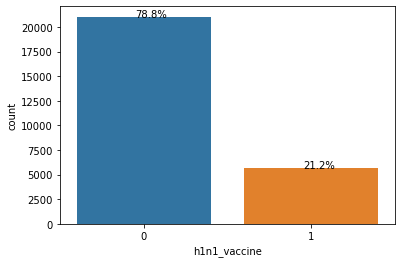

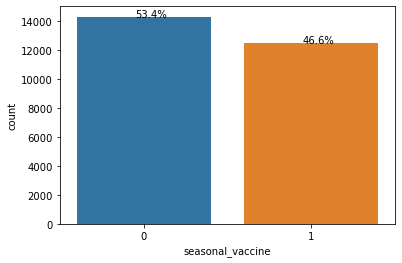

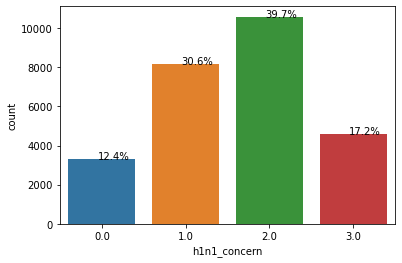

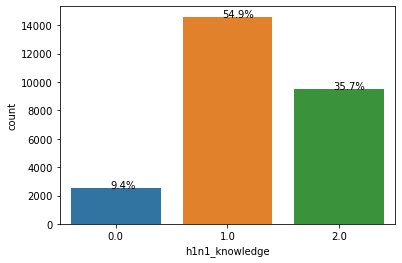

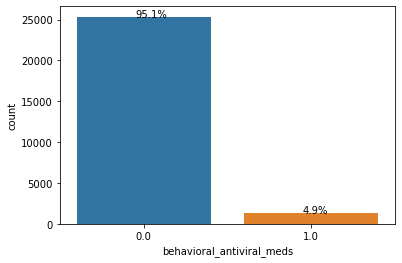

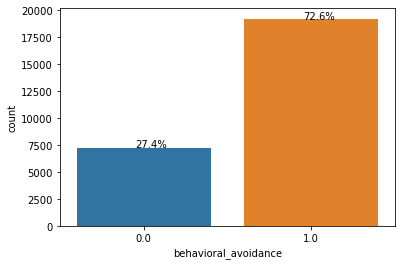

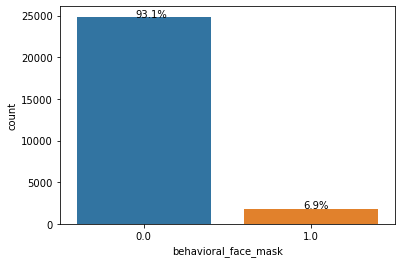

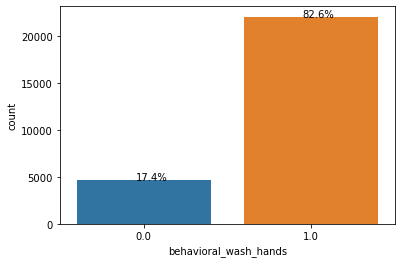

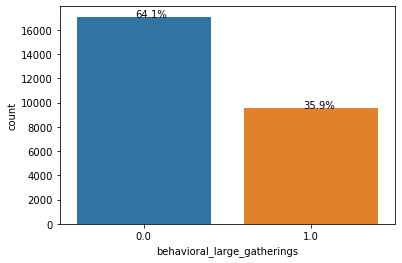

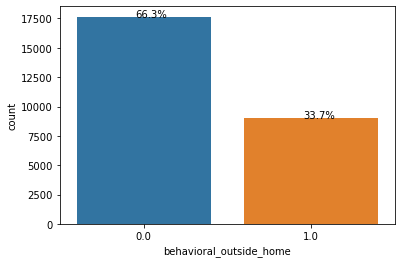

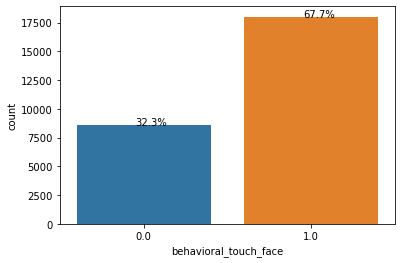

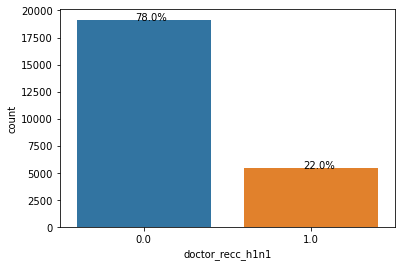

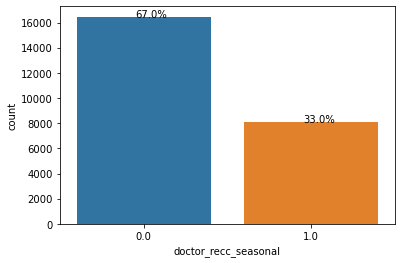

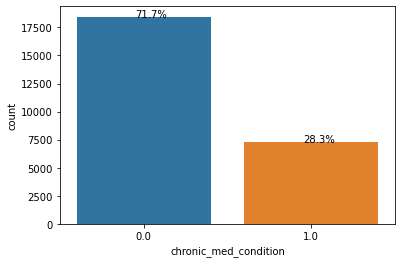

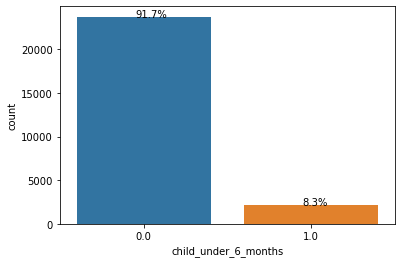

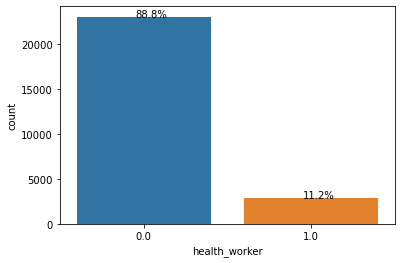

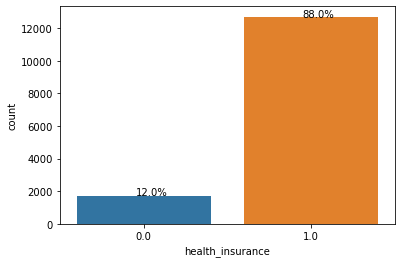

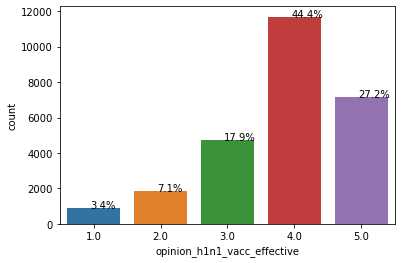

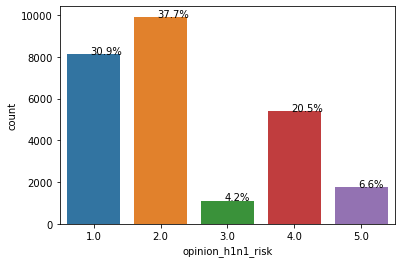

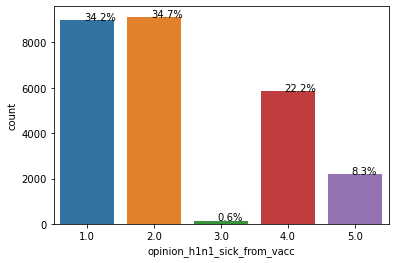

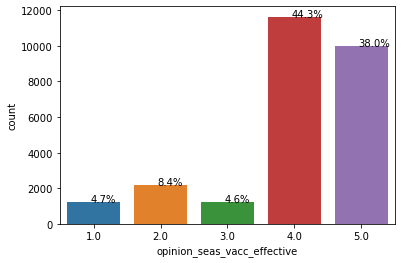

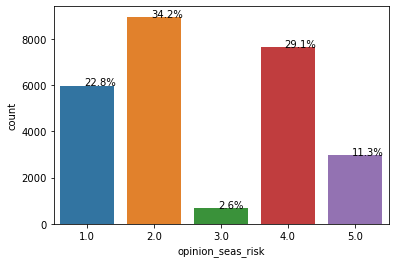

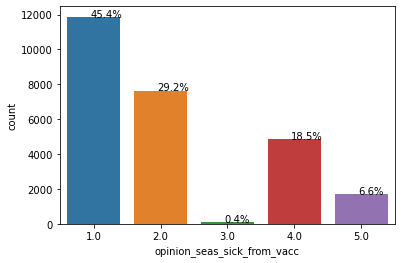

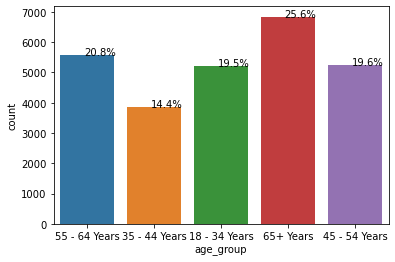

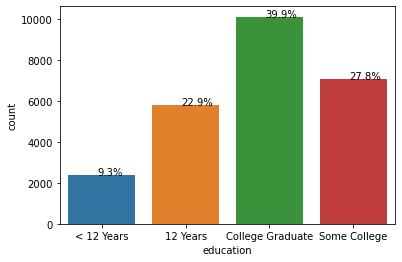

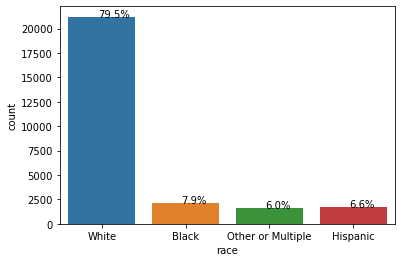

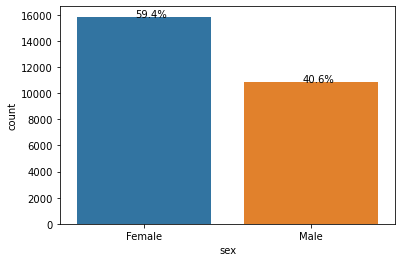

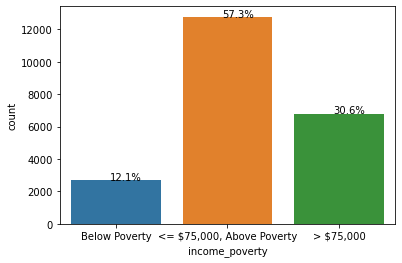

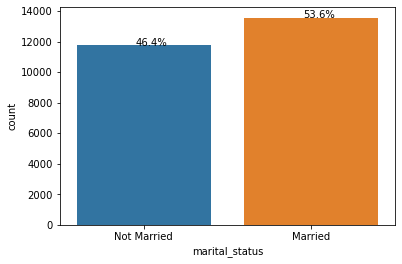

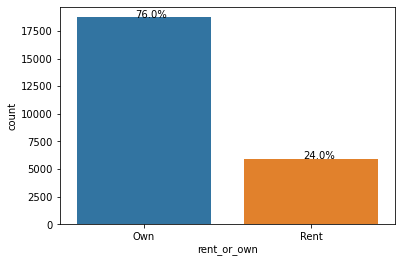

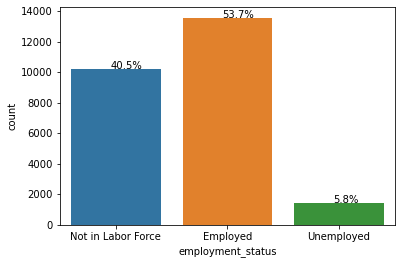

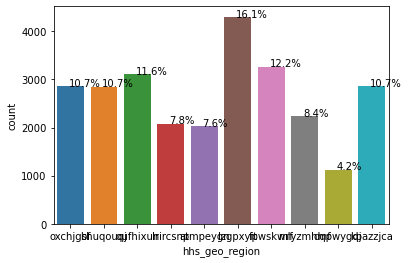

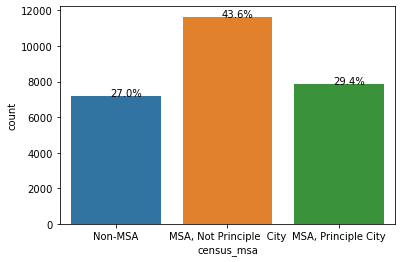

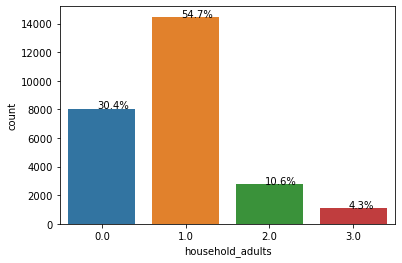

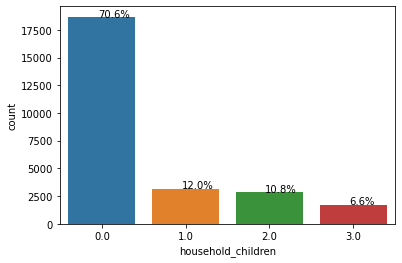

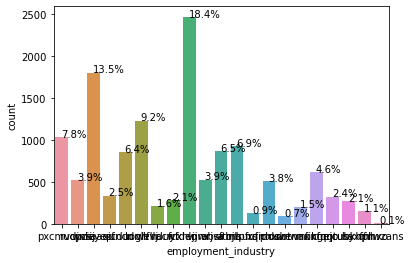

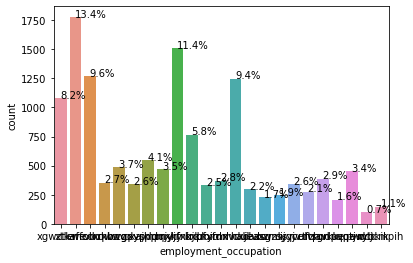

In [71]:
num_cols = len(df.columns)
col_names = df.columns
for i in range(0, num_cols):
    ax = sns.countplot(x=col_names[i], data=df)
    total = len(df[col_names[i]].dropna())
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
    plt.show()
    

## Finding null values (Justin)

In [72]:
df.isnull().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
i

### Visualise distribution of columns with null values (Justin)

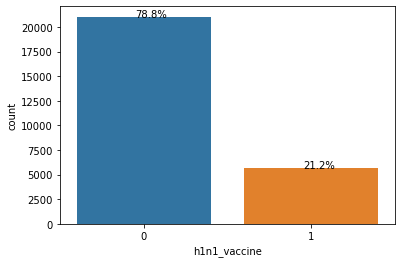

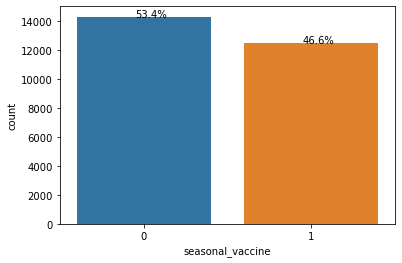

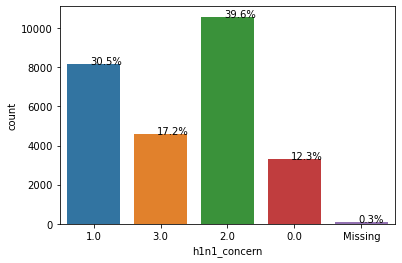

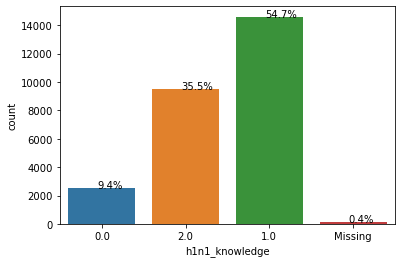

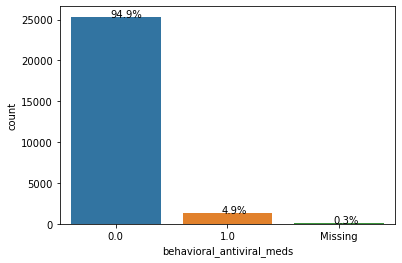

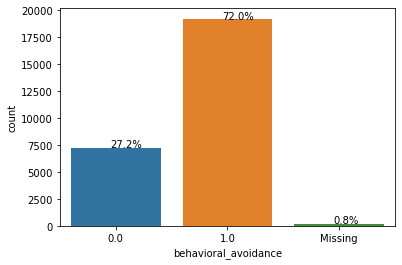

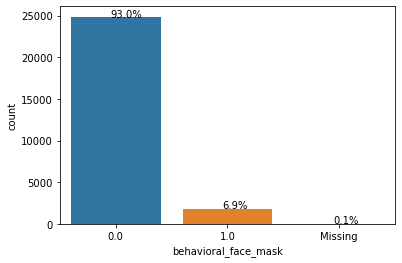

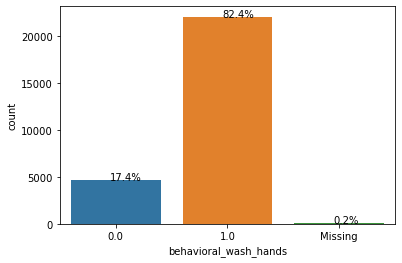

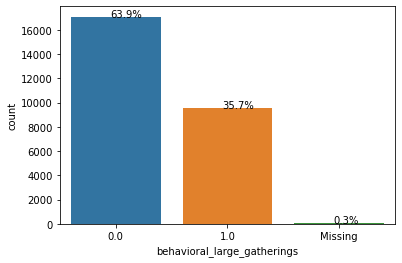

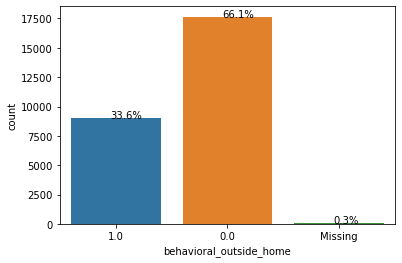

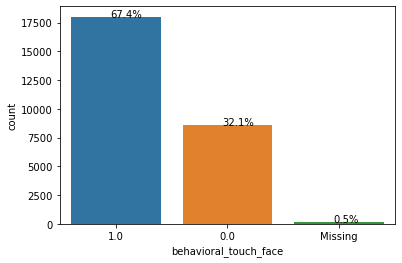

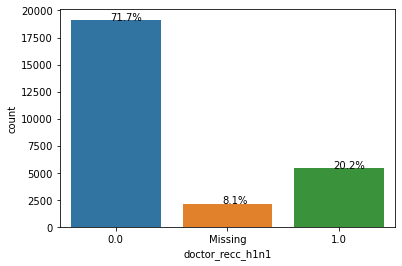

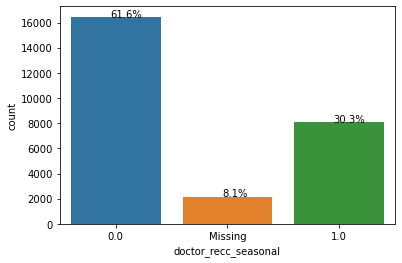

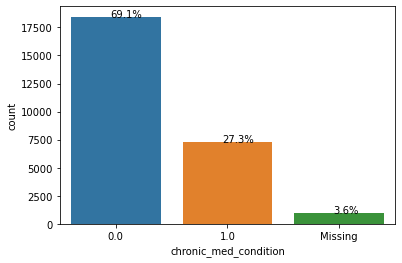

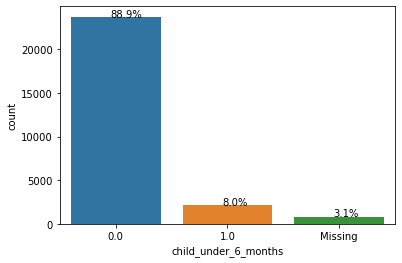

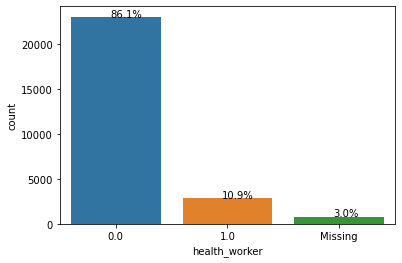

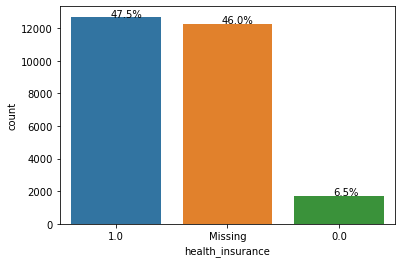

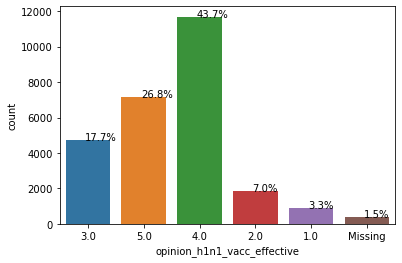

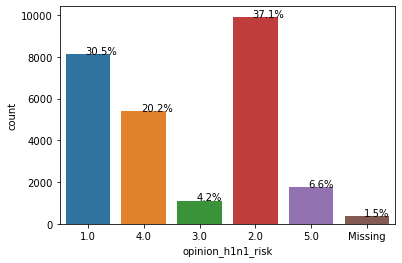

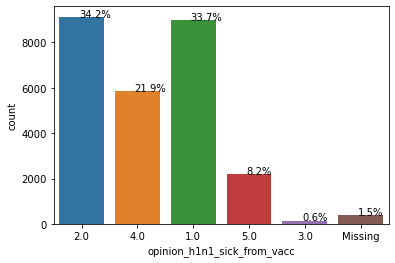

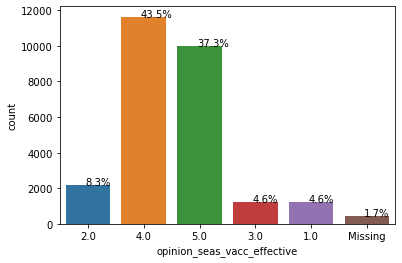

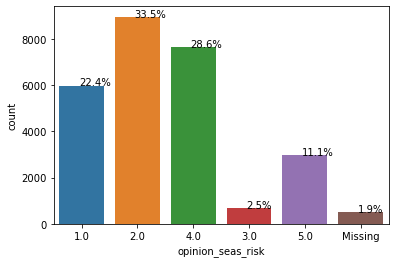

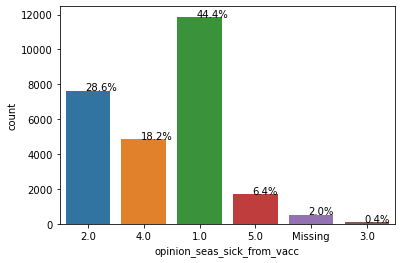

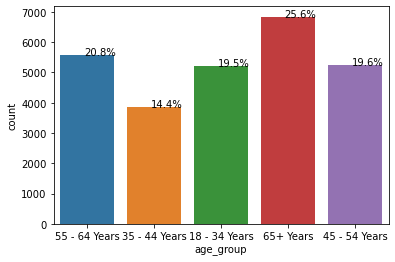

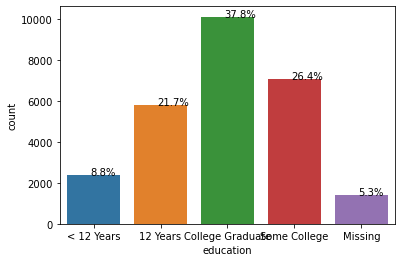

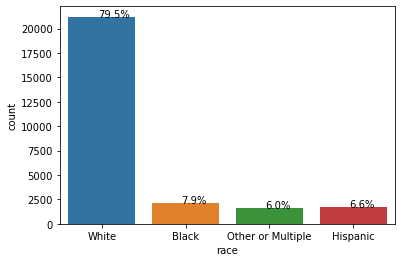

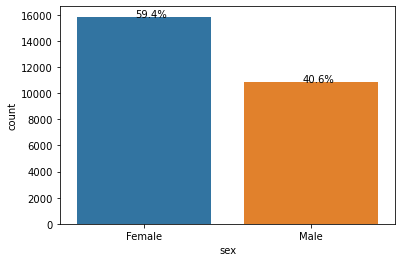

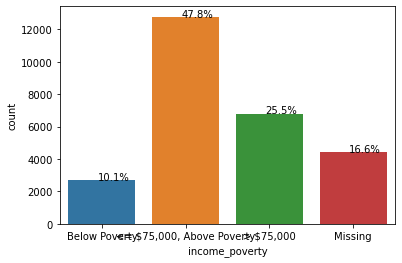

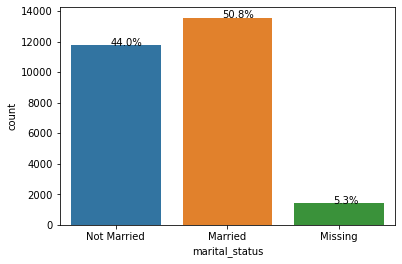

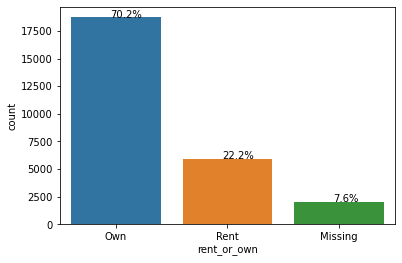

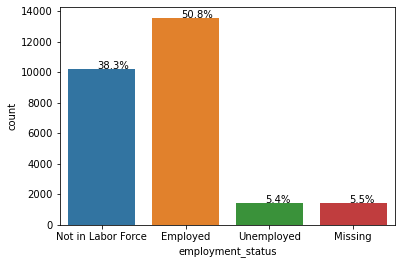

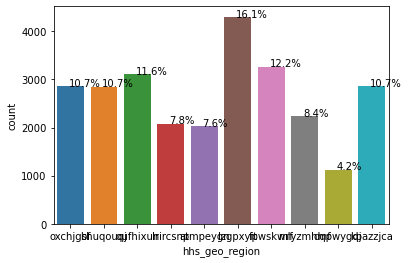

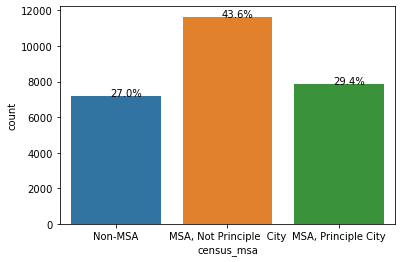

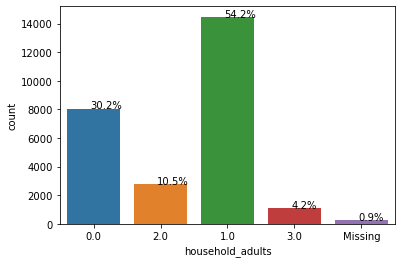

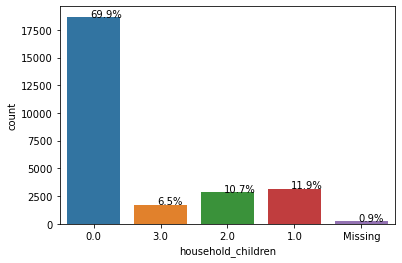

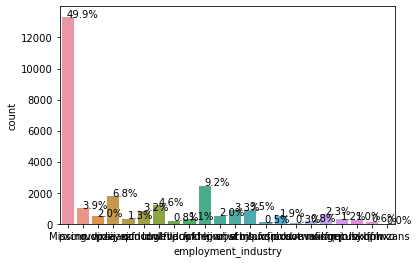

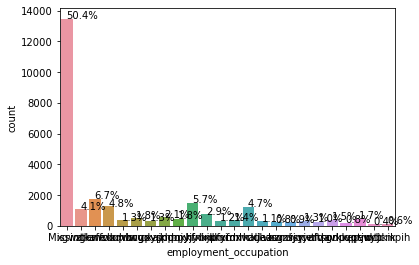

In [73]:
df_null = df
df_null = df_null.fillna("Missing")
num_cols = len(df_null.columns)
col_names = df_null.columns
for i in range(0, num_cols):
    ax = sns.countplot(x=col_names[i], data=df_null)
    total = len(df_null[col_names[i]].dropna())
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
    plt.show()

### Percentage of null values in each column (Justin)

In [74]:
# Calculate the percentage of missing values in each column
missing_percentages = df.isnull().sum() / len(df) * 100

# Print the results
print("Percentage of missing values in each column:")
print(missing_percentages)

Percentage of missing values in each column:
h1n1_vaccine                    0.000000
seasonal_vaccine                0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group   

### Check if null values is missing at random (Justin)

#### Heatmap Visualisation for Missing Values (Justin)

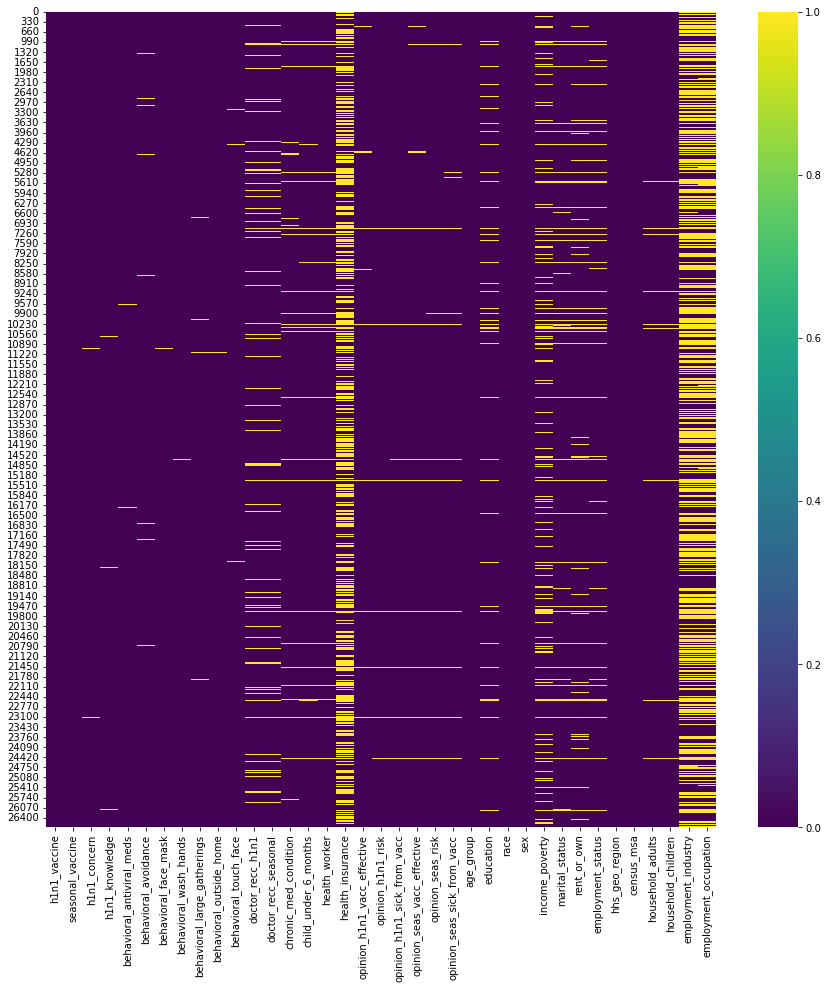

In [75]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

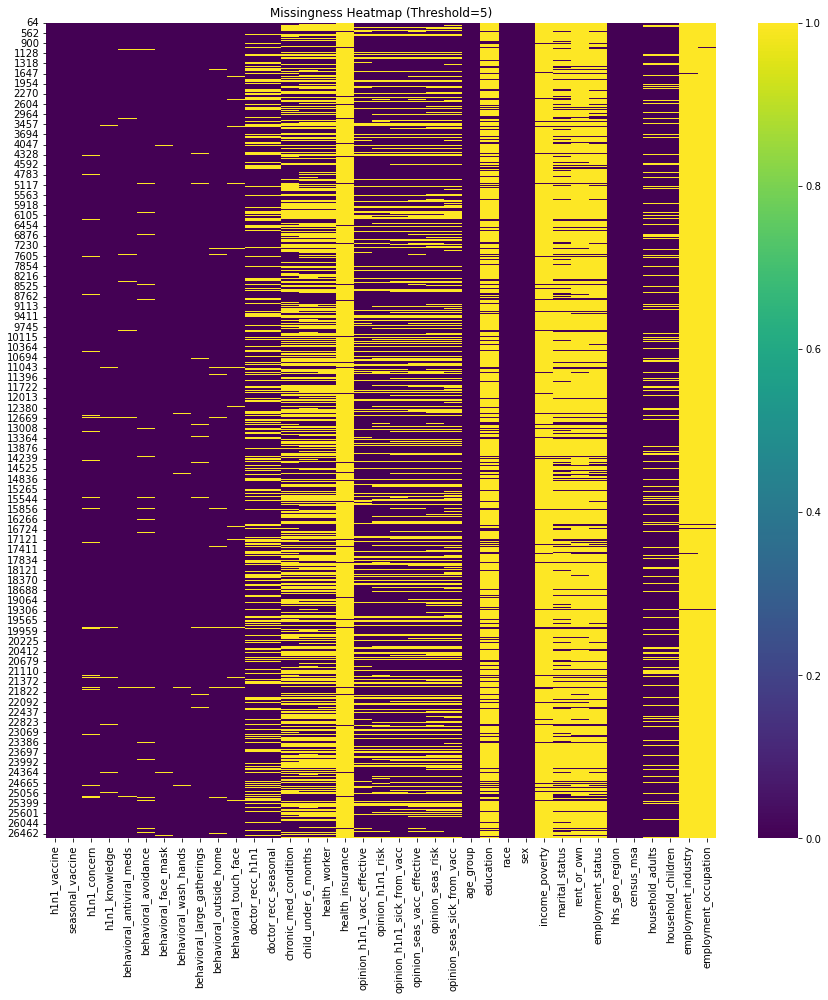

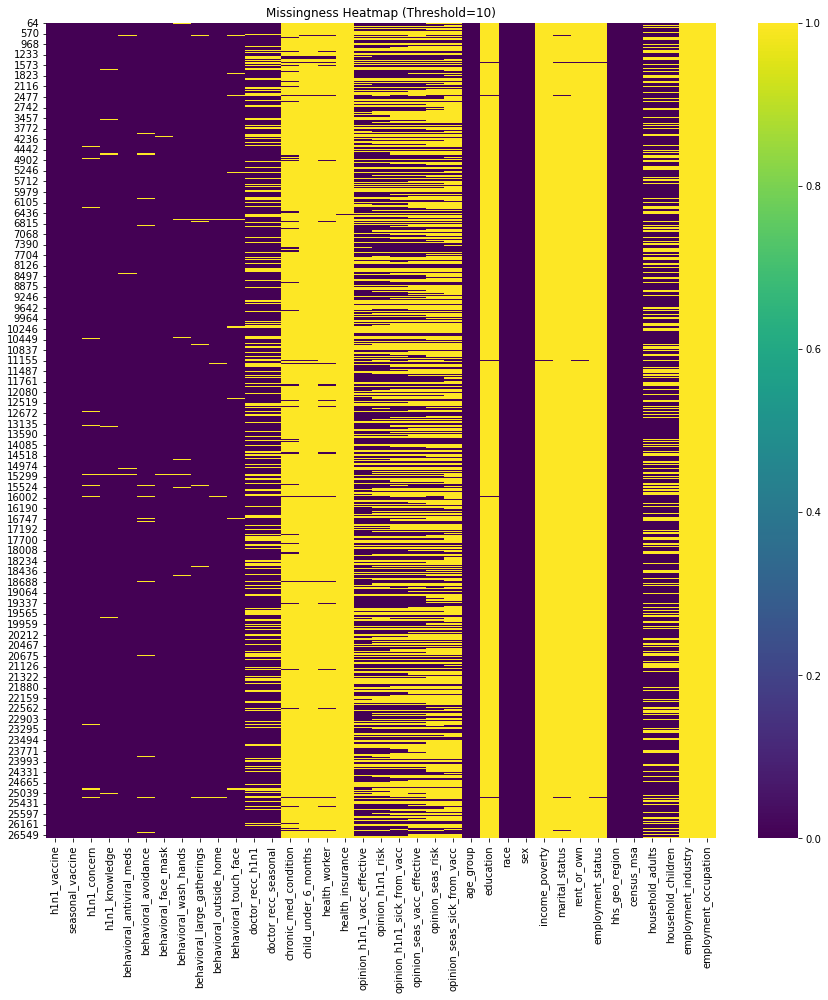

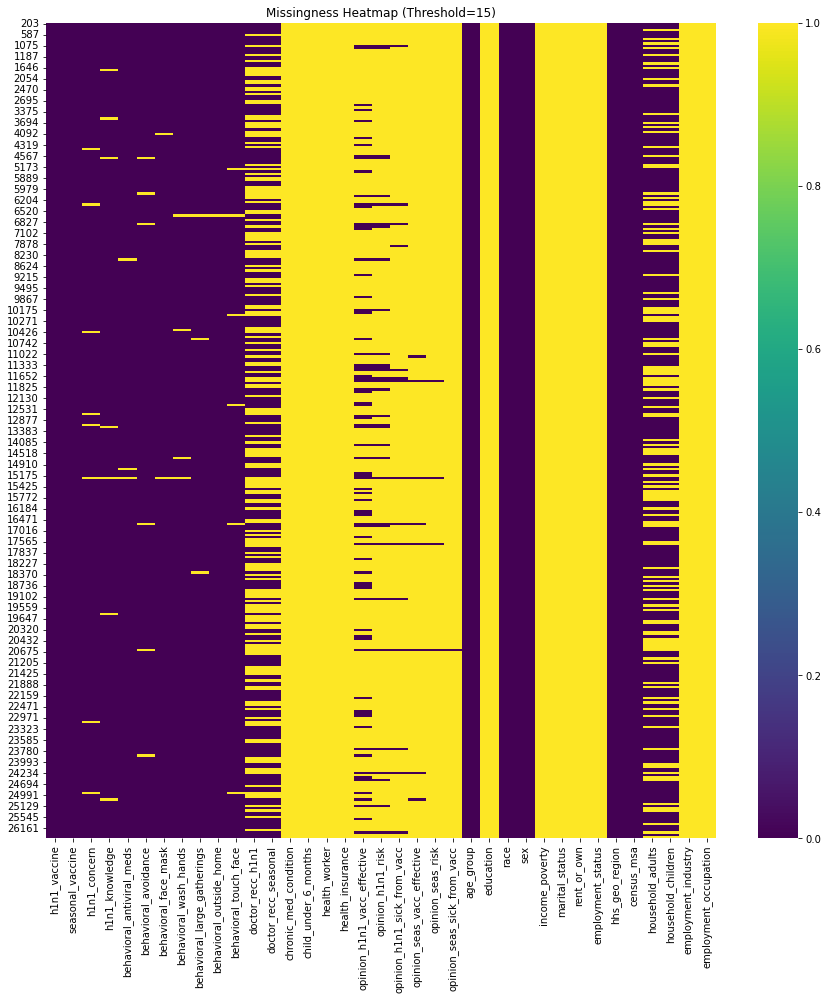

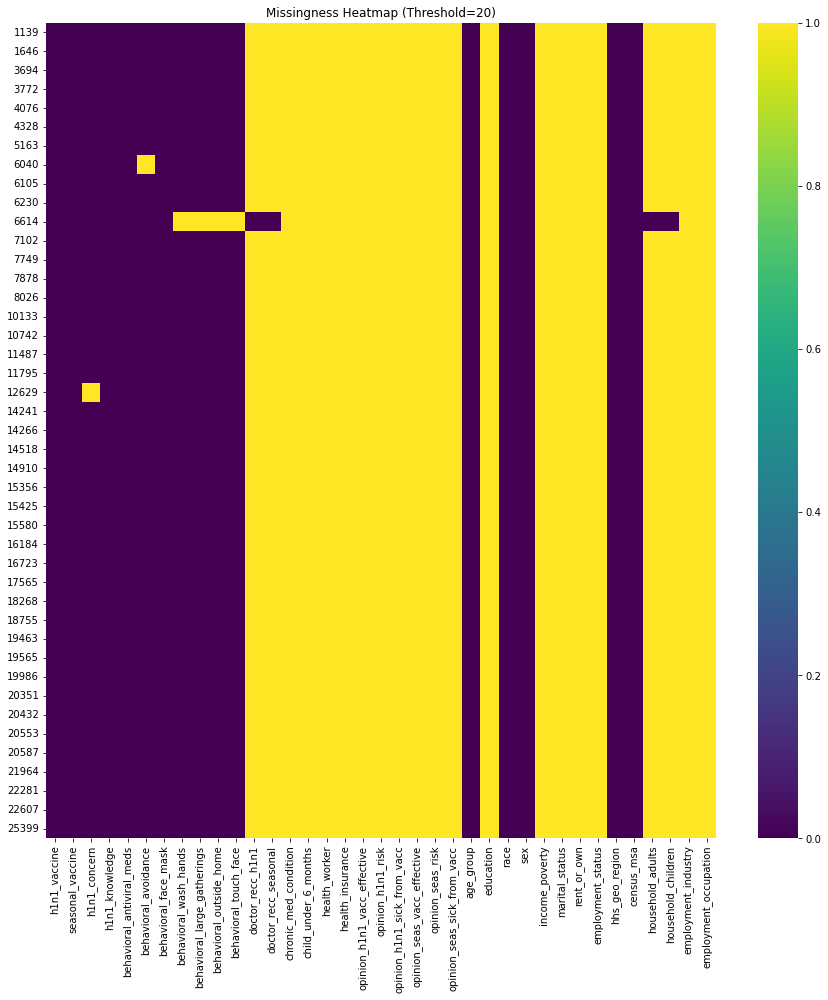

In [76]:
# create a list of threshold values to plot heatmaps for
thresholds = [5, 10, 15, 20]

# loop through the thresholds and plot a heatmap for each
for threshold in thresholds:
    # create a boolean mask of where values are missing
    mask = df.isnull().sum(axis=1) > threshold
    
    # create a heatmap of the missing values using the mask
    plt.figure(figsize=(15,15))
    sns.heatmap(df[mask].isnull(), cmap='viridis')
    plt.title(f"Missingness Heatmap (Threshold={threshold})")
    plt.show()


Hypothesis: The missing values in employment_industry and employment_occupation are due to having Unemployed or Not in Labor Force values in employment_status

In [77]:
# Get rows with "not in labor force" or "unemployed" in employment_status and missing values in employment_industry and employment_occupation
mnar_count = ((df['employment_status'] == 'Not in Labor Force') | (df['employment_status'] == 'Unemployed')) & (df['employment_industry'].isna()) & (df['employment_occupation'].isna())
print(f"Number of rows with 'not in labor force' or 'unemployed' in employment_status and missing values in employment_industry and employment_occupation: {mnar_count.sum()}")

# Count the number of rows where employment_status is Unemployed or Not in Labor Force
print(f"Number of rows with 'not in labor force' or 'unemployed' in employment_status: {df[df['employment_status'].isin(['Unemployed', 'Not in Labor Force'])].shape[0]}")

Number of rows with 'not in labor force' or 'unemployed' in employment_status and missing values in employment_industry and employment_occupation: 11684
Number of rows with 'not in labor force' or 'unemployed' in employment_status: 11684


The number of rows with 'not in labor force' or 'unemployed' in employment_status when employment_industry and employment_occupation is null matches the number of rows with 'not in labor force' or 'unemployed' in employment_status. Meanwhile, the number of missing values in employment_status also matches the number of missing values in employment_industry and employment_occupation when employment_status is null. Therefore, the missing values in employment_industry and employment_occupation are not missing at random.

# Exploratory Data Analysis (Fam)

### Basic EDA (Fam)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   seasonal_vaccine             26707 non-null  int64  
 2   h1n1_concern                 26615 non-null  float64
 3   h1n1_knowledge               26591 non-null  float64
 4   behavioral_antiviral_meds    26636 non-null  float64
 5   behavioral_avoidance         26499 non-null  float64
 6   behavioral_face_mask         26688 non-null  float64
 7   behavioral_wash_hands        26665 non-null  float64
 8   behavioral_large_gatherings  26620 non-null  float64
 9   behavioral_outside_home      26625 non-null  float64
 10  behavioral_touch_face        26579 non-null  float64
 11  doctor_recc_h1n1             24547 non-null  float64
 12  doctor_recc_seasonal         24547 non-null  float64
 13  chronic_med_cond

### Finding total null (Fam)

In [115]:
df.isnull().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
i

### Sort null by acending order (Fam)

In [116]:
df.isnull().sum().sort_values(ascending=False).head(10)

employment_occupation    13470
employment_industry      13330
health_insurance         12274
income_poverty            4423
doctor_recc_h1n1          2160
doctor_recc_seasonal      2160
rent_or_own               2042
employment_status         1463
marital_status            1408
education                 1407
dtype: int64

### Visualise the null values (Fam)

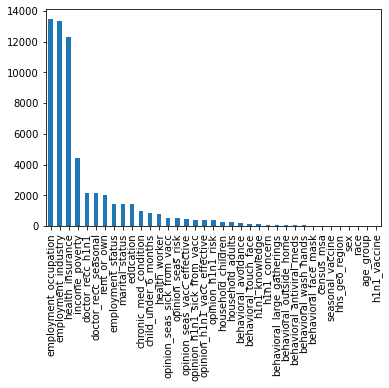

In [117]:
from matplotlib import pyplot as plt
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

### Finding percentage of null in each feature (Fam)

In [118]:
df.isnull().sum()/len(df)*100

h1n1_vaccine                    0.000000
seasonal_vaccine                0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education       

### Check if dataset contains duplicate (Fam)

In [119]:
df.duplicated().sum()

0

### Finding unique value in each column (Fam)

In [120]:
for i in range(1, len(df.columns)):
    print(df.iloc[:, i].unique(), len(df.iloc[:, i].unique()))

[0 1] 2
[ 1.  3.  2.  0. nan] 5
[ 0.  2.  1. nan] 4
[ 0.  1. nan] 3
[ 0.  1. nan] 3
[ 0.  1. nan] 3
[ 0.  1. nan] 3
[ 0.  1. nan] 3
[ 1.  0. nan] 3
[ 1.  0. nan] 3
[ 0. nan  1.] 3
[ 0. nan  1.] 3
[ 0.  1. nan] 3
[ 0.  1. nan] 3
[ 0.  1. nan] 3
[ 1. nan  0.] 3
[ 3.  5.  4.  2.  1. nan] 6
[ 1.  4.  3.  2.  5. nan] 6
[ 2.  4.  1.  5.  3. nan] 6
[ 2.  4.  5.  3.  1. nan] 6
[ 1.  2.  4.  3.  5. nan] 6
[ 2.  4.  1.  5. nan  3.] 6
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years'] 5
['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan] 5
['White' 'Black' 'Other or Multiple' 'Hispanic'] 4
['Female' 'Male'] 2
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan] 4
['Not Married' 'Married' nan] 3
['Own' 'Rent' nan] 3
['Not in Labor Force' 'Employed' 'Unemployed' nan] 4
['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca'] 10
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City'] 3
[ 0. 

# Feature Engineering (Justin)

## Null imputation (Justin)

### MNAR Imputation for employment_industry and employment_occupation (Justin)

In [80]:
# replace missing values in employment_occupation and employment_industry with "Missing" if 'Not in labor force' or "Unemployed" employment_status
df.loc[df['employment_status'].isin(['Not in Labor Force', 'Unemployed']), ['employment_occupation', 'employment_industry']] = df.loc[df['employment_status'].isin(['Not in Labor Force', 'Unemployed']), ['employment_occupation', 'employment_industry']].fillna('Missing')

In [81]:
# Get number of missing values in employment status
print(f"Number of missing values in employment_status: {df['employment_status'].isnull().sum()}")

# Filter for rows where employment industry and occupation are missing 
missing_employment_ind_occ = df[df['employment_status'].isnull() & 
                                df['employment_industry'].isnull() & 
                                df['employment_occupation'].isnull()]

# Get the number of rows in the resulting DataFrame
print(f"Number of missing rows in employment_industry and employment_occupation when employment_status is null: {len(missing_employment_ind_occ)}")

Number of missing values in employment_status: 1463
Number of missing rows in employment_industry and employment_occupation when employment_status is null: 1463


### Remove column with too many missing values (Justin)

The health_insurance column is removed as it contains 46% of missing values

In [82]:
df_dropped = df
df_dropped.drop(['health_insurance'], axis=1, inplace=True)

### Remove rows with too many missing values (Justin)

In [83]:
df_dropped[df_dropped.isnull().sum(axis=1) > 18].shape[0]

56

In [84]:
# Drop rows with more than 10 missing values
df_dropped = df_dropped.dropna(thresh=df.columns.shape[0] - 10)
print(df.shape[0] - df_dropped.shape[0])

# Check distribution of label data after removing rows
print(df_dropped['h1n1_vaccine'].value_counts())
print(df_dropped['seasonal_vaccine'].value_counts())
print(df['h1n1_vaccine'].value_counts())
print(df['seasonal_vaccine'].value_counts())


617
0    20523
1     5567
Name: h1n1_vaccine, dtype: int64
0    13879
1    12211
Name: seasonal_vaccine, dtype: int64
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


## Feature encoding (Justin)

In [85]:
df_encoded = df_dropped.copy()
le = LabelEncoder()

label_encoding = ['employment_industry', 'employment_occupation', 'census_msa', 'hhs_geo_region', 'employment_status', 'rent_or_own', 'marital_status', 'race', 'sex']
df_encoded[label_encoding] = df_encoded[label_encoding].apply(le.fit_transform)

#ordinal encoding on age group, education and income poverty columns using custom order including 'missing'
df_encoded['age_group'] = df_encoded['age_group'].map({'18 - 34 Years': 1, '35 - 44 Years': 2, '45 - 54 Years': 3, '55 - 64 Years': 4, '65+ Years': 5})
df_encoded['education'] = df_encoded['education'].map({'< 12 Years': 1, '12 Years': 2, 'Some College': 3, 'College Graduate': 4})
df_encoded['income_poverty'] = df_encoded['income_poverty'].map({'Below Poverty': 1, '<= $75,000, Above Poverty': 2, '> $75,000': 3})

pd.set_option('display.max_columns', None)
df_encoded.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,4,1.0,3,0,1.0,1,0,1,8,2,0.0,0.0,0,0
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,2,2.0,3,1,1.0,1,1,0,1,0,0.0,0.0,13,20
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,1,4.0,3,1,2.0,1,0,0,9,0,2.0,0.0,15,22
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,5,2.0,3,0,1.0,1,1,1,5,1,0.0,0.0,0,0
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,3,3.0,3,0,2.0,0,0,0,9,0,1.0,0.0,19,6


In [86]:
df_encoded.isnull().sum()

h1n1_vaccine                      0
seasonal_vaccine                  0
h1n1_concern                     82
h1n1_knowledge                  109
behavioral_antiviral_meds        67
behavioral_avoidance            197
behavioral_face_mask             17
behavioral_wash_hands            35
behavioral_large_gatherings      81
behavioral_outside_home          80
behavioral_touch_face           120
doctor_recc_h1n1               1975
doctor_recc_seasonal           1975
chronic_med_condition           381
child_under_6_months            207
health_worker                   192
opinion_h1n1_vacc_effective      93
opinion_h1n1_risk                46
opinion_h1n1_sick_from_vacc      14
opinion_seas_vacc_effective      44
opinion_seas_risk                36
opinion_seas_sick_from_vacc      12
age_group                         0
education                       792
race                              0
sex                               0
income_poverty                 3807
marital_status              

### Compute the correlation matrix for all features (Justin)

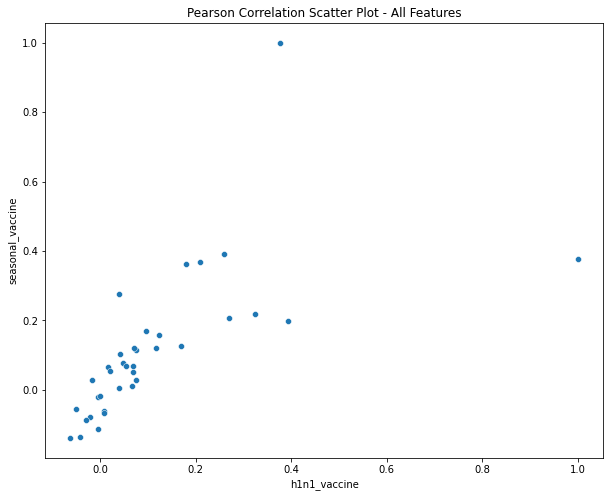

In [87]:
# Compute the correlation matrix for all features
corr_features = df_encoded.iloc[:,:].corr()

# Plot the Pearson correlation scatter plot for all features
plt.figure(figsize=(10, 8))
sns.scatterplot(data=corr_features, x='h1n1_vaccine', y='seasonal_vaccine')
plt.title('Pearson Correlation Scatter Plot - All Features')
plt.xlabel('h1n1_vaccine')
plt.ylabel('seasonal_vaccine')
plt.show()

### Split dataset to be single output (Justin)

In [89]:
h1n1_df = df_encoded.drop('seasonal_vaccine', axis=1)  # Drop the target variable column from the DataFrame
seasonal_df = df_encoded.drop('h1n1_vaccine', axis=1)  # Drop the target variable column from the DataFrame

print(h1n1_df['h1n1_vaccine'].value_counts())
print(seasonal_df['seasonal_vaccine'].value_counts())

0    20523
1     5567
Name: h1n1_vaccine, dtype: int64
0    13879
1    12211
Name: seasonal_vaccine, dtype: int64


### Calculate class weight for label 1 in H1N1 dataset (Justin)

In [90]:
class_count = h1n1_df['h1n1_vaccine'].value_counts()
class_1_weight = class_count[0]/class_count[1]

### H1N1 Vaccine Imputation (Justin)

In [91]:
X_h1n1 = h1n1_df.drop('h1n1_vaccine', axis=1) 
y_h1n1 = h1n1_df['h1n1_vaccine']

In [94]:
# Define the list of imputers and feature selectors to try
imputers = [KNNImputer(weights='uniform', n_neighbors=5),
            KNNImputer(weights='distance', n_neighbors=5)]

# Define the classifier
classifier = LogisticRegression(class_weight={0: 1, 1: class_1_weight})

# Create variables to store the best imputer and its corresponding AUROC
h1n1_imputer = None
best_auroc = 0

# Create a loop to evaluate different imputers
for imputer in imputers:
    # Create the pipeline with current imputer and classifier
    pipeline = Pipeline([
        ('imputer', imputer),
        ('classifier', classifier)
    ])

    # Perform cross-validation with the pipeline
    y_pred_prob = cross_val_predict(pipeline, X_h1n1, y_h1n1, cv=5, method='predict_proba')
    auroc = roc_auc_score(y_h1n1, y_pred_prob[:, 1])

    # Check if the current imputer has a higher AUROC than the best imputer
    if auroc > best_auroc:
        h1n1_imputer = imputer
        best_auroc = auroc

# Print the best imputer and its corresponding AUROC
print(f"Best KNN Weight for H1N1 Imputer: {h1n1_imputer.weights}")
print("Best AUROC:", best_auroc)

Best KNN Weight for H1N1 Imputer: distance
Best AUROC: 0.8290507433943495


### Seasonal Vaccine Imputation (Justin)

In [95]:
X_seasonal = seasonal_df.drop('seasonal_vaccine', axis=1) 
y_seasonal = seasonal_df['seasonal_vaccine']

In [96]:
# Define the list of imputers to try
imputers = [KNNImputer(weights='uniform', n_neighbors=5),
            KNNImputer(weights='distance', n_neighbors=5)]

# Define the classifier
classifier = LogisticRegression()

# Create variables to store the best imputer and its corresponding AUROC
seasonal_imputer = None
best_auroc = 0

# Create a loop to evaluate different imputers
for imputer in imputers:
    # Create the pipeline with current imputer and classifier
    pipeline = Pipeline([
        ('imputer', imputer),
        ('classifier', classifier)
    ])

    # Perform cross-validation with the pipeline
    y_pred_prob = cross_val_predict(pipeline, X_seasonal, y_seasonal, cv=5, method='predict_proba')
    auroc = roc_auc_score(y_seasonal, y_pred_prob[:, 1])

    # Check if the current imputer has a higher AUROC than the best imputer
    if auroc > best_auroc:
        seasonal_imputer = imputer
        best_auroc = auroc

# Print the best imputer and its corresponding AUROC
print(f"Best KNN Weight for Seasonal Imputer: {seasonal_imputer.weights}")
print("Best AUROC:", best_auroc)

Best KNN Weight for Seasonal Imputer: uniform
Best AUROC: 0.846524882460231


In [45]:
X_seasonal.isnull().sum()

h1n1_concern                     82
h1n1_knowledge                  109
behavioral_antiviral_meds        67
behavioral_avoidance            197
behavioral_face_mask             17
behavioral_wash_hands            35
behavioral_large_gatherings      81
behavioral_outside_home          80
behavioral_touch_face           120
doctor_recc_h1n1               1975
doctor_recc_seasonal           1975
chronic_med_condition           381
child_under_6_months            207
health_worker                   192
opinion_h1n1_vacc_effective      93
opinion_h1n1_risk                46
opinion_h1n1_sick_from_vacc      14
opinion_seas_vacc_effective      44
opinion_seas_risk                36
opinion_seas_sick_from_vacc      12
age_group                         0
education                       792
race                              0
sex                               0
income_poverty                 3807
marital_status                    0
rent_or_own                       0
employment_status           

## H1N1 Feature Selection (Justin)

In [99]:
# Define the list of imputers and feature selectors to try
feature_selectors = [RFE(estimator=LogisticRegression()),
                    SelectKBest(chi2),
                    SelectKBest(mutual_info_classif)]

# Define the classifier
classifier = LogisticRegression(class_weight={0: 1, 1: class_1_weight})

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Selector', 'AUROC'])

h1n1_selector = None
best_auroc = 0

# Create a loop to evaluate different combinations
for selector in feature_selectors:
    if isinstance(selector, RFE):
        # Set the number of features to be selected
        selector.n_features_to_select = 20  # Adjust the value as needed
        
    if isinstance(selector, SelectKBest):
        # Set the k value for the chi-square test (number of top features to select)
        selector.k = 20  # Adjust the value as needed
    
    # Create the pipeline with current imputer and selector
    pipeline = Pipeline([
        ('imputer', KNNImputer(weights='distance', n_neighbors=5)),
        ('selector', selector),
        ('classifier', classifier)
    ])

    # Perform cross-validation with the pipeline
    y_pred_prob = cross_val_predict(pipeline, X_h1n1, y_h1n1, cv=5, method='predict_proba')
    auroc = roc_auc_score(y_h1n1, y_pred_prob[:, 1])

    # Print the AUROC for the current combination
    print(f"Selector: {type(selector).__name__}")
    print("AUROC:", auroc)
    print("------")

    # Update the best selector if the current AUROC is higher
    if auroc > best_auroc:
        h1n1_selector = selector
        best_auroc = auroc

    # Add the results to the dataframe
    results_df = results_df.append({'Selector': type(selector).__name__,
                                    'AUROC': auroc}, ignore_index=True)


## H1N1 Feature Selection
# Save the results dataframe as a CSV file
results_df.to_csv('h1n1_selector_results.csv', index=False)

Selector: RFE
AUROC: 0.8282540407923251
------
Selector: SelectKBest
AUROC: 0.8261712592568008
------
Selector: SelectKBest
AUROC: 0.8251228663952987
------


## Seasonal Feature Selection (Justin)

In [100]:
# Define the list of imputers and feature selectors to try
feature_selectors = [RFE(estimator=LogisticRegression()),
                    SelectKBest(chi2),
                    SelectKBest(mutual_info_classif)]

# Define the classifier
classifier = LogisticRegression()

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Selector', 'AUROC'])

seasonal_selector = None
best_auroc = 0

# Create a loop to evaluate different combinations
for selector in feature_selectors:
    if isinstance(selector, RFE):
        # Set the number of features to be selected
        selector.n_features_to_select = 20  # Adjust the value as needed

    if isinstance(selector, SelectKBest):
        # Set the k value for the chi-square test (number of top features to select)
        selector.k = 20  # Adjust the value as needed

    # Create the pipeline with current imputer and selector
    pipeline = Pipeline([
        ('imputer', KNNImputer(weights='uniform', n_neighbors=5)),
        ('selector', selector),
        ('classifier', classifier)
    ])

    # Perform cross-validation with the pipeline
    y_pred_prob = cross_val_predict(pipeline, X_seasonal, y_seasonal, cv=5, method='predict_proba')
    auroc = roc_auc_score(y_seasonal, y_pred_prob[:, 1])

    # Print the AUROC for the current combination
    print(f"Selector: {type(selector).__name__}")
    print("AUROC:", auroc)
    print("------")

    # Update the best selector if the current AUROC is higher
    if auroc > best_auroc:
        seasonal_selector = selector
        best_auroc = auroc

    # Add the results to the dataframe
    results_df = results_df.append({'Selector': type(selector).__name__,
                                    'AUROC': auroc}, ignore_index=True)

# Save the results dataframe as a CSV file
results_df.to_csv('seasonal_selector_results.csv', index=False)


Selector: RFE
AUROC: 0.8461243283278459
------
Selector: SelectKBest
AUROC: 0.8447762945780987
------
Selector: SelectKBest
AUROC: 0.844837565620983
------


# Selected Features EDA (Justin)



In [101]:
h1n1_df_2 = h1n1_df.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
h1n1_df_2 = pd.DataFrame(imputer.fit_transform(h1n1_df_2), columns=h1n1_df_2.columns)

X = h1n1_df_2.drop(['h1n1_vaccine'],axis=1)
y = h1n1_df_2['h1n1_vaccine']
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=42))
sel_.fit_transform(X,y)

selected_feat = X.columns[(sel_.get_support())]
print(selected_feat)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_large_gatherings',
       'doctor_recc_h1n1', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'income_poverty', 'hhs_geo_region', 'employment_occupation'],
      dtype='object')


## Dimensionality Reduction (Justin)

### PCA on H1N1 Dataset (Justin)

In [102]:
# Define the numbers of PCA components to evaluate
n_components_list = [5, 10, 15]

# Perform the tests
for n_components in n_components_list:
    # Create the pipeline with the chosen preprocessing steps and Logistic Regression
    pipeline = make_pipeline(
        KNNImputer(weights='distance', n_neighbors=5),
        RFE(estimator=LogisticRegression(), n_features_to_select=20),
        PCA(n_components=n_components),
        LogisticRegression(class_weight={0: 1, 1: class_1_weight})
    )

    # Perform cross-validation and obtain cross-validated predictions
    y_pred_prob = cross_val_predict(pipeline, X_h1n1, y_h1n1, cv=5, method='predict_proba')[:, 1]

    # Calculate AUROC
    auroc = roc_auc_score(y_h1n1, y_pred_prob)

    # Print AUROC score for the current number of components
    print("Number of PCA components:", n_components)
    print("AUROC:", auroc)
    print("------")

# Test without PCA for comparison
pipeline_no_pca = make_pipeline(
    KNNImputer(weights='distance', n_neighbors=5),
    RFE(estimator=LogisticRegression(), n_features_to_select=20),
    LogisticRegression(class_weight={0: 1, 1: class_1_weight})
)

# Perform cross-validation and obtain cross-validated predictions without PCA
y_pred_prob_no_pca = cross_val_predict(pipeline_no_pca, X_h1n1, y_h1n1, cv=5, method='predict_proba')[:, 1]

# Calculate AUROC without PCA
auroc_no_pca = roc_auc_score(y_h1n1, y_pred_prob_no_pca)

print("Without PCA")
print("AUROC:", auroc_no_pca)


Number of PCA components: 5
AUROC: 0.7637209681049291
------
Number of PCA components: 10
AUROC: 0.78673945850761
------
Number of PCA components: 15
AUROC: 0.8027697018108491
------
Without PCA
AUROC: 0.8282540407923251


### PCA on Seasonal Dataset (Justin)

In [103]:
# Define the numbers of PCA components to evaluate
n_components_list = [5, 10, 15]

# Perform the tests
for n_components in n_components_list:
    # Create the pipeline with the chosen preprocessing steps and Logistic Regression
    pipeline = make_pipeline(
        KNNImputer(weights='uniform', n_neighbors=5),
        RFE(estimator=LogisticRegression(), n_features_to_select=20),
        PCA(n_components=n_components),
        LogisticRegression()
    )

    # Perform cross-validation and obtain cross-validated predictions
    y_pred_prob = cross_val_predict(pipeline, X_seasonal, y_seasonal, cv=5, method='predict_proba')[:, 1]

    # Calculate AUROC
    auroc = roc_auc_score(y_seasonal, y_pred_prob)

    # Print AUROC score for the current number of components
    print("Number of PCA components:", n_components)
    print("AUROC:", auroc)
    print("------")

# Test without PCA for comparison
pipeline_no_pca = make_pipeline(
    KNNImputer(weights='uniform', n_neighbors=5),
    RFE(estimator=LogisticRegression(), n_features_to_select=20),
    LogisticRegression()
)

# Perform cross-validation and obtain cross-validated predictions without PCA
y_pred_prob_no_pca = cross_val_predict(pipeline_no_pca, X_seasonal, y_seasonal, cv=5, method='predict_proba')[:, 1]

# Calculate AUROC without PCA
auroc_no_pca = roc_auc_score(y_seasonal, y_pred_prob_no_pca)

print("Without PCA")
print("AUROC:", auroc_no_pca)


Number of PCA components: 5
AUROC: 0.8223109398154854
------
Number of PCA components: 10
AUROC: 0.8313992398555341
------
Number of PCA components: 15
AUROC: 0.8392220810312019
------
Without PCA
AUROC: 0.8461243283278459


# Feature Engineering (Fam)

## Encoding (Fam)

In [121]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

df1 = df.copy()
le = LabelEncoder()

label_encoding = ['employment_industry', 'employment_occupation', 'census_msa', 'hhs_geo_region', 'employment_status', 'rent_or_own', 'marital_status', 'race', 'sex']
df1[label_encoding] = df1[label_encoding].apply(le.fit_transform)

#ordinal encoding on age group, education and income poverty columns using custom order including 'missing'
df1['age_group'] = df1['age_group'].map({'18 - 34 Years': 1, '35 - 44 Years': 2, '45 - 54 Years': 3, '55 - 64 Years': 4, '65+ Years': 5, 'missing': 6})
df1['education'] = df1['education'].map({'< 12 Years': 1, '12 Years': 2, 'Some College': 3, 'College Graduate': 4, 'missing': 5})
df1['income_poverty'] = df1['income_poverty'].map({'Below Poverty': 1, '<= $75,000, Above Poverty': 2, '> $75,000': 3, 'missing': 4})

pd.set_option('display.max_columns', None)
df1.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,4,1.0,3,0,1.0,1,0,1,8,2,0.0,0.0,21,23
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,2,2.0,3,1,1.0,1,1,0,1,0,0.0,0.0,12,19
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,1,4.0,3,1,2.0,1,0,0,9,0,2.0,0.0,14,21
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,5,2.0,3,0,1.0,1,1,1,5,1,0.0,0.0,21,23
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,3,3.0,3,0,2.0,0,0,0,9,0,1.0,0.0,18,5


### Correlation matrix visualise all features (Fam)

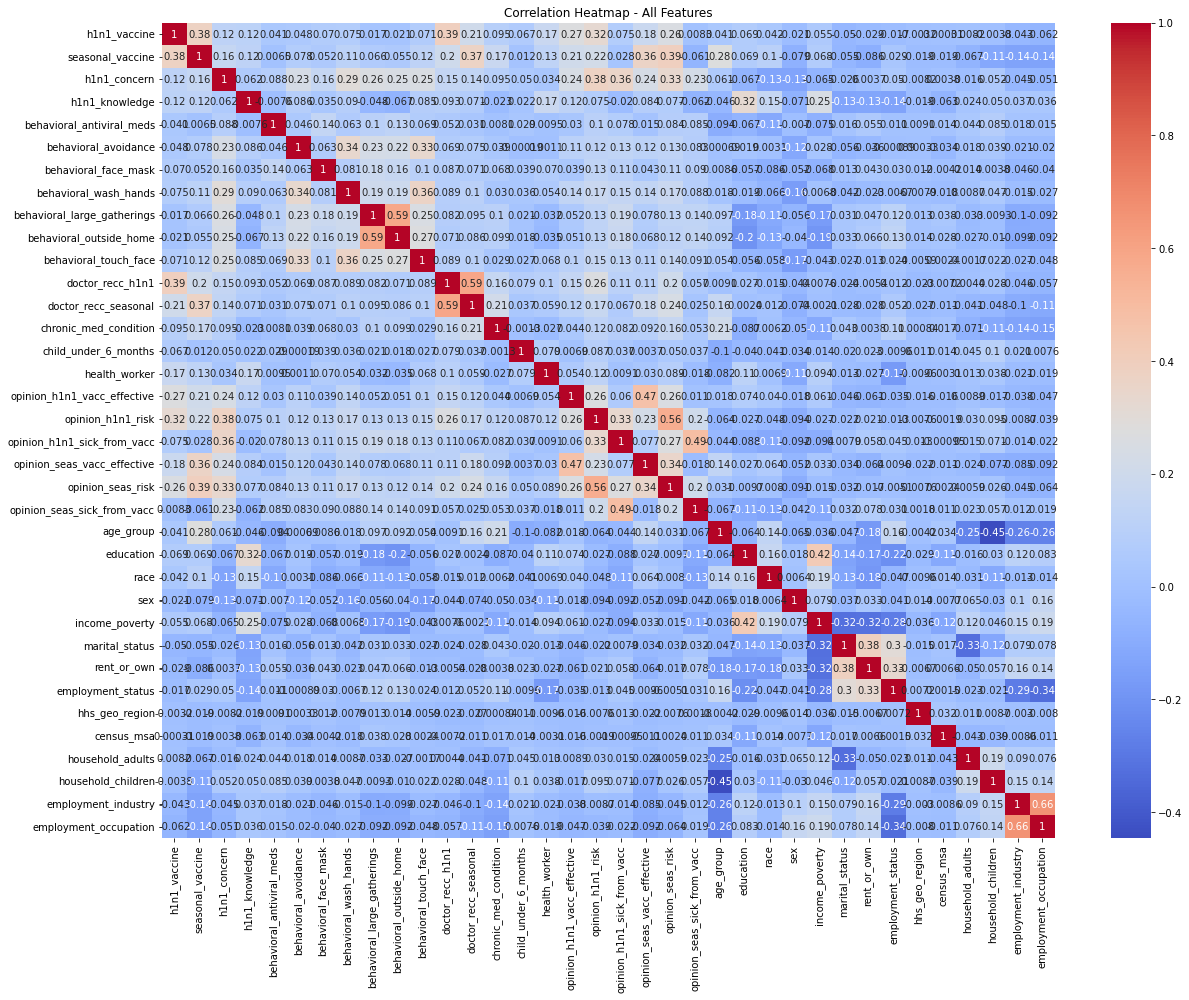

In [122]:
# Compute the correlation matrix for all features
corr_features = df_encoded.iloc[:,:].corr()

# Plot the correlation heatmap for all features
plt.figure(figsize=(20, 15))
sns.heatmap(corr_features, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - All Features')
plt.show()


## Null Imputation (Fam)

### KNN, Mode, MissForest and Iterative Imputer (Fam)

In [18]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import sys, sklearn
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
import numpy as np

# Define the imputers
imputers = [
    ('df_KNN', KNNImputer(n_neighbors=3)),
    ('df_mode', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('df_missF', MissForest(criterion='squared_error')),
    ('df_imp', IterativeImputer())
]

for df_name, imputer in imputers:
    # Copy the original dataframe
    df = df1.copy()

    # Perform imputation
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # Save the imputed dataframe as a global variable
    globals()[df_name] = df
    print(df_name, "done")

df_KNN done
df_mode done
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
df_missF done
df_imp done


## Feature Selection (Fam)

###  Lasso, RandomForest and XGBoost for feature selection (Fam)

In [123]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

# List of datasets
datasets = [df_KNN, df_mode, df_missF, df_imp]
datasets_names = ["KNN", "Mode", "Miss Forest", "Iterative imputer"]

# List of models
models = [Lasso(alpha=0.005, random_state=69),
          RandomForestClassifier(n_estimators=100, random_state=69), 
          XGBClassifier(n_estimators=100, random_state=69)]

models_names = ["Lasso", "RandomForest", "XGBoost"]

target_names = ['h1n1_vaccine','seasonal_vaccine']

selected_features_dict = {}

for target in target_names:
    # Assuming you have your target variable y
    for i, data in enumerate(datasets):
        X = data.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1)  # replace 'y' with your target variable column name
        y = data[target]  # replace 'y' with your target variable column name

        for j, model in enumerate(models):
            selector = SelectFromModel(estimator=model).fit(X, y)
            selected_feat = X.columns[(selector.get_support())]
            print(target)
            print(f'Imputer: {datasets_names[i]}, Model: {models_names[j]}')
            print(selected_feat)
            
            selected_features_dict[(target, datasets_names[i], models_names[j])] = list(selected_feat)


h1n1_vaccine
Imputer: KNN, Model: Lasso
Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_large_gatherings',
       'doctor_recc_h1n1', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'employment_status', 'hhs_geo_region', 'employment_industry',
       'employment_occupation'],
      dtype='object')
h1n1_vaccine
Imputer: KNN, Model: RandomForest
Index(['h1n1_concern', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupation'],
      dtype='object')
h1n1_vaccine
Imputer: KNN, Model: XGBoost
Index(['docto

### Print number of features extracted using each method (Fam)

In [124]:
import matplotlib.pyplot as plt

# Create a dictionary to store the number of features extracted for each combination
num_features_extracted = {}

for key, value in selected_features_dict.items():
    num_features = len(value)
    num_features_extracted[key] = num_features
    print(f'Target: {key[0]}, Imputer: {key[1]}, Model: {key[2]}, Number of features extracted: {num_features}')

Target: h1n1_vaccine, Imputer: KNN, Model: Lasso, Number of features extracted: 18
Target: h1n1_vaccine, Imputer: KNN, Model: RandomForest, Number of features extracted: 15
Target: h1n1_vaccine, Imputer: KNN, Model: XGBoost, Number of features extracted: 4
Target: h1n1_vaccine, Imputer: Mode, Model: Lasso, Number of features extracted: 17
Target: h1n1_vaccine, Imputer: Mode, Model: RandomForest, Number of features extracted: 14
Target: h1n1_vaccine, Imputer: Mode, Model: XGBoost, Number of features extracted: 4
Target: h1n1_vaccine, Imputer: Miss Forest, Model: Lasso, Number of features extracted: 19
Target: h1n1_vaccine, Imputer: Miss Forest, Model: RandomForest, Number of features extracted: 14
Target: h1n1_vaccine, Imputer: Miss Forest, Model: XGBoost, Number of features extracted: 6
Target: h1n1_vaccine, Imputer: Iterative imputer, Model: Lasso, Number of features extracted: 19
Target: h1n1_vaccine, Imputer: Iterative imputer, Model: RandomForest, Number of features extracted: 10
T

### Visualise the results on graph (Fam)

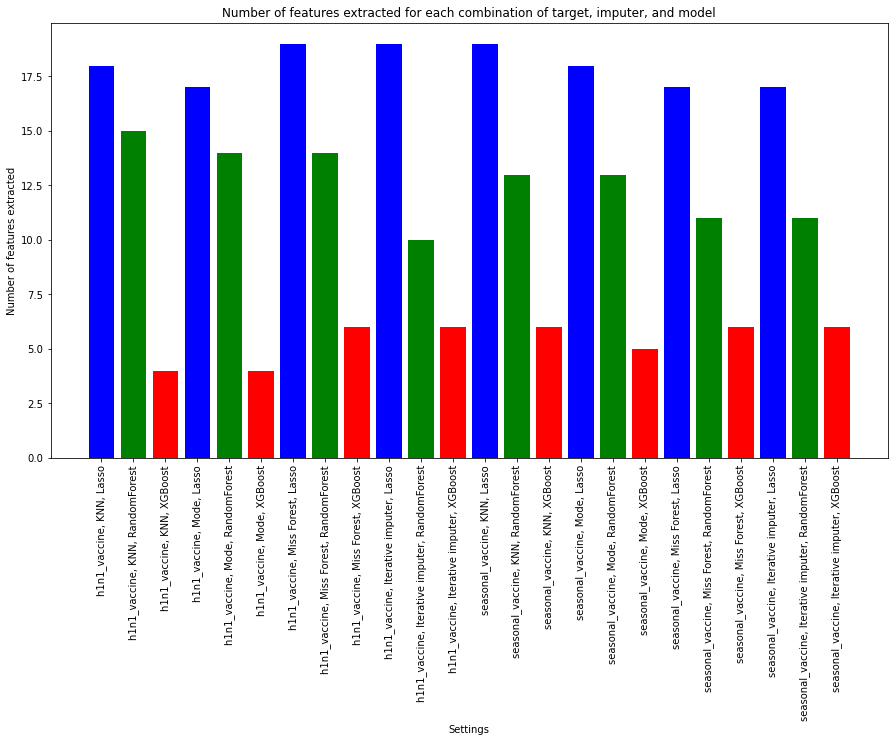

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary to store the number of features extracted for each combination
num_features_extracted = {}

for key, value in selected_features_dict.items():
    num_features = len(value)
    num_features_extracted[key] = num_features

# Convert the dictionary to a pandas DataFrame for easy visualization
df_num_features = pd.DataFrame(list(num_features_extracted.items()), columns=['Settings', 'Number of features'])

# Extract the settings as a string for the x-axis labels
df_num_features['Settings'] = df_num_features['Settings'].apply(lambda x: ', '.join(x))
df_num_features['Model'] = df_num_features['Settings'].apply(lambda x: x.split(", ")[2]) # Extract Model from Settings

# Define a color map
color_map = {'Lasso': 'b', 'RandomForest': 'g', 'XGBoost': 'r'} 

# Plot a bar chart
plt.figure(figsize=(15, 8))

# Color code bars
for i, row in df_num_features.iterrows():
    plt.bar(row['Settings'], row['Number of features'], color=color_map[row['Model']])

plt.xlabel('Settings')
plt.ylabel('Number of features extracted')
plt.title('Number of features extracted for each combination of target, imputer, and model')
plt.xticks(rotation=90)
plt.show()


based on the bar chart above, we can see that using Lasso has the highest extraction of features, following by random forest and XGBoost having the least amount of features extracted

### Find the frequency of features extracted by each models (Fam)

In [126]:
from collections import Counter

# Initialize a Counter object
feature_counter = Counter()

# Loop over the selected features dictionary and update the counter
for key, features in selected_features_dict.items():
    feature_counter.update(features)

# Convert the Counter object to a DataFrame for easy visualization and sorting
df_feature_counts = pd.DataFrame.from_dict(feature_counter, orient='index').reset_index()
df_feature_counts.columns = ['Feature', 'Count']

# Sort the DataFrame by count in descending order
df_feature_counts = df_feature_counts.sort_values(by='Count', ascending=False)

# Reset the index
df_feature_counts = df_feature_counts.reset_index(drop=True)

print(df_feature_counts)

                        Feature  Count
0             opinion_h1n1_risk     20
1             opinion_seas_risk     20
2                     age_group     20
3   opinion_seas_vacc_effective     18
4                 health_worker     16
5   opinion_h1n1_vacc_effective     16
6          doctor_recc_seasonal     16
7         employment_occupation     16
8           employment_industry     16
9              health_insurance     14
10                    education     13
11  opinion_h1n1_sick_from_vacc     13
12               hhs_geo_region     12
13             doctor_recc_h1n1     12
14  opinion_seas_sick_from_vacc     12
15                 h1n1_concern      9
16            employment_status      8
17                         race      8
18               h1n1_knowledge      8
19               income_poverty      6
20                   census_msa      4
21        behavioral_touch_face      4
22        chronic_med_condition      4
23  behavioral_large_gatherings      3


### Visualise frequency of features extracted (Fam)

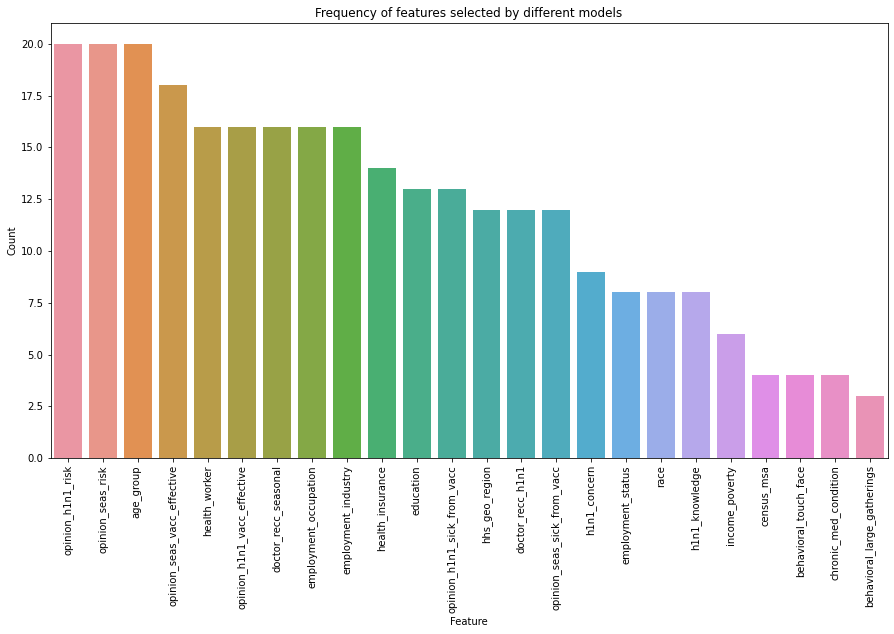

In [127]:
# Plot a bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Feature', y='Count', data=df_feature_counts)
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Frequency of features selected by different models')
plt.xticks(rotation=90)
plt.show()

Based on the graph above, we can see the features ranking to most important to least important <br>
opinion_h1n1_risk, opinion_seas_risk and age_group are the factors that affects the model the most

### Fit each model to a baseline predictive model to see the auroc score (Fam)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# Create an empty dictionary to store the trained models
trained_models = {}

# Create an empty dictionary to store the model performance
model_performance = {}

for target in target_names:
    for i, data in enumerate(datasets):
        for model_name in models_names:
            # Retrieve the selected features
            selected_features = selected_features_dict[(target, datasets_names[i], model_name)]

            # Create the feature matrix and target vector
            X = data[selected_features]
            y = data[target]

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Train the logistic regression model
            logreg = LogisticRegression()
            logreg.fit(X_train, y_train)

            # Save the trained model to the dictionary
            trained_models[(target, datasets_names[i], model_name)] = logreg

            # Predict on the test set
            y_pred = logreg.predict(X_test)

            # Compute the probabilities of the positive class
            y_pred_prob = logreg.predict_proba(X_test)[:, 1]

            # Compute and save the performance
            auroc = roc_auc_score(y_test, y_pred_prob)
            report = classification_report(y_test, y_pred)

            model_performance[(target, datasets_names[i], model_name)] = (auroc, report)

            print(f'Target: {target}, Imputer: {datasets_names[i]}, Model: {model_name}')
            print(f'AUROC: {auroc}')
            print(f'Classification Report:\n{report}')

# Initialize the best score and settings
best_auroc_h1n1 = 0
best_settings_h1n1 = None

best_auroc_seasonal = 0
best_settings_seasonal = None

# Iterate over the model_performance dictionary
for (target, imputer, model), (auroc, report) in model_performance.items():
    if target == 'h1n1_vaccine' and auroc > best_auroc_h1n1:
        best_auroc_h1n1 = auroc
        best_settings_h1n1 = (imputer, model)
    elif target == 'seasonal_vaccine' and auroc > best_auroc_seasonal:
        best_auroc_seasonal = auroc
        best_settings_seasonal = (imputer, model)

print(f'Best AUROC for h1n1_vaccine: {best_auroc_h1n1}')
print(f'Best settings for h1n1_vaccine: Imputer - {best_settings_h1n1[0]}, Model - {best_settings_h1n1[1]}')

print(f'Best AUROC for seasonal_vaccine: {best_auroc_seasonal}')
print(f'Best settings for seasonal_vaccine: Imputer - {best_settings_seasonal[0]}, Model - {best_settings_seasonal[1]}')


Target: h1n1_vaccine, Imputer: KNN, Model: Lasso
AUROC: 0.823711540562573
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      4212
         1.0       0.68      0.41      0.51      1130

    accuracy                           0.83      5342
   macro avg       0.77      0.68      0.70      5342
weighted avg       0.82      0.83      0.82      5342

Target: h1n1_vaccine, Imputer: KNN, Model: RandomForest
AUROC: 0.8234368302952373
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      4212
         1.0       0.67      0.39      0.49      1130

    accuracy                           0.83      5342
   macro avg       0.76      0.67      0.70      5342
weighted avg       0.81      0.83      0.81      5342

Target: h1n1_vaccine, Imputer: KNN, Model: XGBoost
AUROC: 0.8203030322130617
Classification Report:
              precision    recall  f1-score 

From the findings above, we can see that: <br>

Best AUROC for h1n1_vaccine: 0.8363481078082847<br>
Best settings for h1n1_vaccine: Imputer - Iterative imputer, Model - XGBoost<br><br>

Best AUROC for seasonal_vaccine: 0.8594574024452425<br>
Best settings for seasonal_vaccine: Imputer - Iterative imputer, Model - Lasso<br>



# Model Selection (Justin)



### Model training for H1N1 (Justin)

In [106]:
%%time
# Define the classifiers to try
classifiers = [
    RandomForestClassifier(class_weight={0: 1, 1: class_1_weight}),
    LogisticRegression(class_weight={0: 1, 1: class_1_weight}),
    XGBClassifier(scale_pos_weight=class_1_weight)
]

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Classifier', 'AUROC'])

best_auroc = 0
best_classifier = None

# Create an empty dictionary to store the best models
best_models = {}

# Perform model selection
for classifier in classifiers:
    # Create the pipeline with the current classifier
    pipeline = make_pipeline(
        KNNImputer(weights='distance', n_neighbors=5),
        RFE(estimator=LogisticRegression(), n_features_to_select = 20),
        classifier
    )
    
    # Perform cross-validation with AUROC scoring
    cv_scores = cross_val_score(pipeline, X_h1n1, y_h1n1, cv=5, scoring='roc_auc')
    
    # Calculate the mean AUROC score
    auroc_mean = cv_scores.mean()

    # Print the AUROC for the current classifier
    print("Classifier:", type(classifier).__name__)
    print("AUROC:", auroc_mean)
    print("------")

    # Update the best classifier if the current AUROC is higher
    if auroc_mean > best_auroc:
        best_classifier = classifier
        best_auroc = auroc_mean

    # Add the results to the dataframe
    results_df = results_df.append({'Classifier': type(classifier).__name__,
                                    'AUROC': auroc_mean}, ignore_index=True)
    # Save the best model using pickle
    best_models[type(classifier).__name__] = pipeline
    
# Save the results dataframe as a CSV file
results_df.to_csv('h1n1_classifier_results.csv', index=False)

# Save the best models using pickle
for model_name, model in best_models.items():
    with open(f'h1n1_{model_name}.pickle', 'wb') as file:
        pickle.dump(model, file)

Classifier: RandomForestClassifier
AUROC: 0.8126849324859482
------
Classifier: LogisticRegression
AUROC: 0.8282612510709164
------
Classifier: XGBClassifier
AUROC: 0.8204733079400949
------
Wall time: 4min 36s


### Model training for Seasonal  (Justin)

In [107]:
%%time

# Define the classifiers to try
classifiers = [
    RandomForestClassifier(class_weight={0: 1, 1: class_1_weight}),
    LogisticRegression(),
    XGBClassifier()
]

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Classifier', 'AUROC'])

best_auroc = 0
best_classifier = None

# Create an empty dictionary to store the best models
best_models = {}

# Perform model selection
for classifier in classifiers:
    # Create the pipeline with the current classifier
    pipeline = make_pipeline(
        KNNImputer(weights='uniform', n_neighbors=5),
        RFE(estimator=LogisticRegression(), n_features_to_select=20),
        classifier
    )
    
    # Perform cross-validation with AUROC scoring
    cv_scores = cross_val_score(pipeline, X_seasonal, y_seasonal, cv=5, scoring='roc_auc')
    
    # Calculate the mean AUROC score
    auroc_mean = cv_scores.mean()

    # Print the AUROC for the current classifier
    print("Classifier:", type(classifier).__name__)
    print("AUROC:", auroc_mean)
    print("------")

    # Update the best classifier if the current AUROC is higher
    if auroc_mean > best_auroc:
        best_classifier = classifier
        best_auroc = auroc_mean

    # Add the results to the dataframe
    results_df = results_df.append({'Classifier': type(classifier).__name__,
                                    'AUROC': auroc_mean}, ignore_index=True)
    # Save the best model using pickle
    best_models[type(classifier).__name__] = pipeline
    
# Save the results dataframe as a CSV file
results_df.to_csv('seasonal_classifier_results.csv', index=False)

# Save the best models using pickle
for model_name, model in best_models.items():
    with open(f'seasonal_{model_name}.pickle', 'wb') as file:
        pickle.dump(model, file)


Classifier: RandomForestClassifier
AUROC: 0.8303387273780286
------
Classifier: LogisticRegression
AUROC: 0.8461279388615643
------
Classifier: XGBClassifier
AUROC: 0.8433391814178108
------
Wall time: 4min 22s


# Model Selection (Fam)

### Selecting the best model with hyperparameter tuning for h1n1_vaccine dataset (Fam)

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import pickle


# Define the models with initial hyperparameters
models = [
    ('SVM', SVC(probability=True), {'m__C': [0.1, 1, 10], 'm__gamma': [0.1, 1, 10]}),
    ('CatBoost', CatBoostClassifier(verbose=0), {'m__learning_rate': [0.03, 0.1], 'm__depth': [4, 6, 10]}),
    ('MLP', MLPClassifier(max_iter=1000), {'m__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'm__alpha': [0.0001, 0.05]})
]

# Retrieve the selected features
selected_features = selected_features_dict[('h1n1_vaccine', 'Iterative imputer', 'XGBoost')]

# Create the feature matrix and target vector
X = df_imp[selected_features]
y = df_imp['h1n1_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

for model_name, model, params in models:
        # Create a pipeline
        pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', model)])

        # Grid search
        grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='roc_auc')
        grid_search.fit(X_train, y_train)

        # Save the trained model
        with open(f'h1n1_vaccine_{model_name}_best_estimator.pkl', 'wb') as f:
            pickle.dump(grid_search.best_estimator_, f)
        
        # Cross validation
        cv_score = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='roc_auc')

        print(f'Target: h1n1_vaccine, Model: {model_name}')
        print(f'Best AUROC: {grid_search.best_score_}')
        print(f'Best params: {grid_search.best_params_}')
        print(f'CV AUROC: {cv_score.mean()}')
        
        


Target: h1n1_vaccine, Model: SVM
Best AUROC: 0.8022584017461474
Best params: {'m__C': 0.1, 'm__gamma': 0.1}
CV AUROC: 0.7993705166808677
Target: h1n1_vaccine, Model: CatBoost
Best AUROC: 0.855220815201089
Best params: {'m__depth': 4, 'm__learning_rate': 0.03}
CV AUROC: 0.8563260331975634
Target: h1n1_vaccine, Model: MLP
Best AUROC: 0.8415720467476835
Best params: {'m__alpha': 0.0001, 'm__hidden_layer_sizes': (50, 100, 50)}
CV AUROC: 0.8449384183254635


### Plotting AUROC for H1N1 (Fam)

In [128]:
selected_features = selected_features_dict[('h1n1_vaccine', 'Iterative imputer', 'XGBoost')]
X = df_imp[selected_features]
y = df_imp['h1n1_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

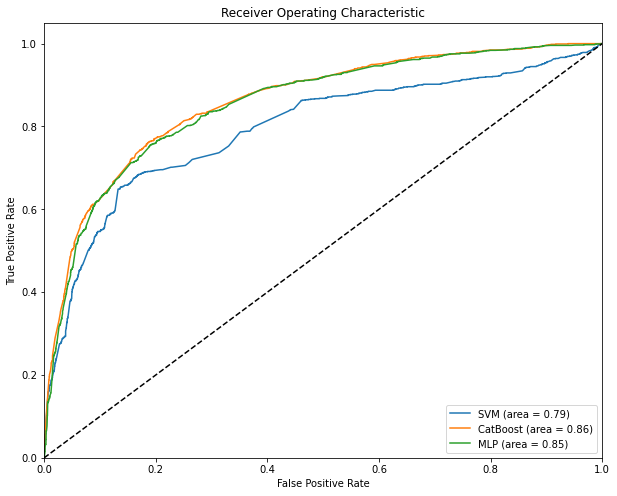

In [131]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pickle

# List of model pickle file names
model_files = ['h1n1_vaccine_SVM_best_estimator.pkl', 'h1n1_vaccine_CatBoost_best_estimator.pkl', 'h1n1_vaccine_MLP_best_estimator.pkl']
model_names = ['SVM', 'CatBoost', 'MLP']

plt.figure(figsize=(10, 8))

# Iterate over each model
for model_file, model_name in zip(model_files, model_names):
    # Load the model from the pickle file
    with open(model_file, 'rb') as f:
        model = pickle.load(f)

    # Generate prediction probabilities for the test set
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The best model for h1n1_vaccine is CatBoost <br>
Best params: {'m__depth': 4, 'm__learning_rate': 0.03} <br>
CV AUROC: 0.8563260331975634

### Selecting the best model with hyperparameter tuning for seasonal_vaccine dataset (Fam)

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import pickle


# Define the models with initial hyperparameters
models = [
    ('SVM', SVC(probability=True), {'m__C': [0.1, 1, 10], 'm__gamma': [0.1, 1, 10]}),
    ('CatBoost', CatBoostClassifier(verbose=0), {'m__learning_rate': [0.03, 0.1], 'm__depth': [4, 6, 10]}),
    ('MLP', MLPClassifier(max_iter=1000), {'m__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'm__alpha': [0.0001, 0.05]})
]

# Retrieve the selected features
selected_features = selected_features_dict[('seasonal_vaccine', 'Iterative imputer', 'Lasso')]

# Create the feature matrix and target vector
X = df_imp[selected_features]
y = df_imp['seasonal_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

for model_name, model, params in models:
        # Create a pipeline
        pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', model)])

        # Grid search
        grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='roc_auc')
        grid_search.fit(X_train, y_train)

        # Save the trained model
        with open(f'seasonal_vaccine_{model_name}_best_estimator.pkl', 'wb') as f:
            pickle.dump(grid_search.best_estimator_, f)
        
        # Cross validation
        cv_score = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='roc_auc')

        print(f'Target: seasonal_vaccine, Model: {model_name}')
        print(f'Best AUROC: {grid_search.best_score_}')
        print(f'Best params: {grid_search.best_params_}')
        print(f'CV AUROC: {cv_score.mean()}')
        
        


Target: seasonal_vaccine, Model: SVM
Best AUROC: 0.8445988257027572
Best params: {'m__C': 1, 'm__gamma': 0.1}
CV AUROC: 0.8454994184141873
Target: seasonal_vaccine, Model: CatBoost
Best AUROC: 0.8791244968207472
Best params: {'m__depth': 6, 'm__learning_rate': 0.03}
CV AUROC: 0.8801030073046283
Target: seasonal_vaccine, Model: MLP
Best AUROC: 0.8581452862870274
Best params: {'m__alpha': 0.05, 'm__hidden_layer_sizes': (100,)}
CV AUROC: 0.8586309879959287


### Plotting AUROC for Seasonal (Fam)

In [57]:
selected_features = selected_features_dict[('seasonal_vaccine', 'Iterative imputer', 'Lasso')]
X = df_imp[selected_features]
y = df_imp['seasonal_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

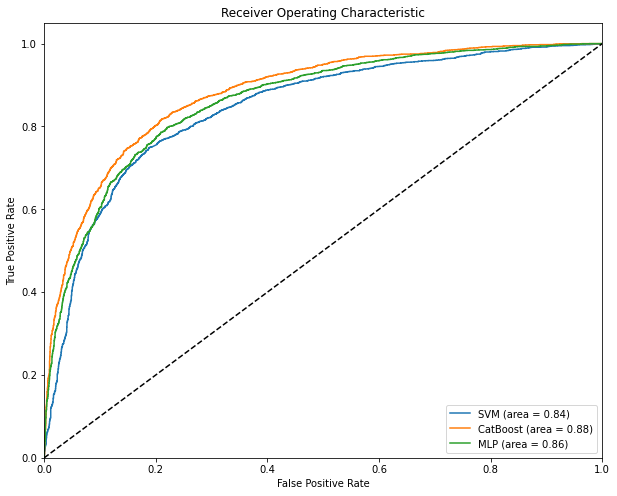

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pickle

# List of model pickle file names
model_files = ['seasonal_vaccine_SVM_best_estimator.pkl', 'seasonal_vaccine_CatBoost_best_estimator.pkl', 'seasonal_vaccine_MLP_best_estimator.pkl']
model_names = ['SVM', 'CatBoost', 'MLP']

plt.figure(figsize=(10, 8))

# Iterate over each model
for model_file, model_name in zip(model_files, model_names):
    # Load the model from the pickle file
    with open(model_file, 'rb') as f:
        model = pickle.load(f)

    # Generate prediction probabilities for the test set
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The best model for seasonal_vaccine is CatBoost<br>
Best params: {'m__depth': 6, 'm__learning_rate': 0.03} <br> 
CV AUROC: 0.8801030073046283

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

# Define the models with default hyperparameters
models = [
    ('SVM', SVC(probability=True), {}),
    ('CatBoost', CatBoostClassifier(verbose=0), {}),
    ('MLP', MLPClassifier(max_iter=1000), {})
]

# Retrieve the selected features
selected_features = selected_features_dict[('h1n1_vaccine', 'Iterative imputer', 'XGBoost')]

# Create the feature matrix and target vector
X = df_imp[selected_features]
y = df_imp['h1n1_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

for model_name, model, params in models:
    # Create a pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', model)])

    # Grid search with default parameters
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=2, scoring='roc_auc')
    grid_search.fit(X_train, y_train)

    # Cross validation
    cv_score = cross_val_score(grid_search.best_estimator_, X, y, cv=2, scoring='roc_auc')

    print(f'Target: h1n1_vaccine, Model: {model_name}')
    print(f'Best AUROC: {grid_search.best_score_}')
    print(f'Best params: {grid_search.best_params_}')
    print(f'CV AUROC: {cv_score.mean()}')


Target: h1n1_vaccine, Model: SVM
Best AUROC: 0.7975271042361476
Best params: {}
CV AUROC: 0.7989627325402784
Target: h1n1_vaccine, Model: CatBoost
Best AUROC: 0.8506479823594695
Best params: {}
CV AUROC: 0.8513212241497304
Target: h1n1_vaccine, Model: MLP
Best AUROC: 0.83025796745125
Best params: {}
CV AUROC: 0.8392668962310744


## Model Selection

### H1N1 Model Selection

In [65]:
# Split the dataset into training and testing sets
X_h1n1_train, X_h1n1_test, y_h1n1_train, y_h1n1_test = train_test_split(X_h1n1, y_h1n1, test_size=0.2, random_state=69)

# Define the pipeline with the imputer, selector, and scaler
pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    SelectFromModel(Lasso(alpha=0.005, random_state=69)),
    StandardScaler()
)

# Fit the pipeline on the training data and transform it
X_h1n1_train_scaled = pipeline.fit_transform(X_h1n1_train, y_h1n1_train)

# Define the models with class weights and their respective hyperparameter grids
models = {
    'Random Forest': (RandomForestClassifier(class_weight={0: 1, 1: class_1_weight}), {'n_estimators': [100, 200, 300]}),
    'SVM': (SVC(class_weight={0: 1, 1: class_1_weight}), {'C': [1, 10, 100]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Logistic Regression': (LogisticRegression(class_weight={0: 1, 1: class_1_weight}), {'C': [0.1, 1, 10]}),
    'CatBoost': (CatBoostClassifier(scale_pos_weight=class_1_weight), {'iterations': [100, 200, 300]})
}

# Create an empty dictionary to store the AUROC scores
auroc_scores = {}

# Iterate over the models
for model_name, (model, param_grid) in models.items():
    # Perform grid search cross-validation with the current model
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_h1n1_train_scaled, y_h1n1_train)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    
    # Get the best hyperparameter settings
    best_params = grid_search.best_params_
    
    # Print the best hyperparameter settings
    print(f"Best hyperparameters for {model_name}: {best_params}")
    
    # Scale the test data using the fitted scaler
    X_h1n1_test_selected = h1n1_selector.transform(h1n1_imputer.transform(X_h1n1_test))
    X_h1n1_test_scaled = scaler.transform(X_h1n1_test_selected)
    
    # Make predictions on the test set
    y_pred_prob = best_model.predict_proba(X_h1n1_test_scaled)[:, 1]  # Probability of positive class
    
    # Calculate AUROC for the current model
    auroc = roc_auc_score(y_h1n1_test, y_pred_prob)
    
    # Store the AUROC score in the dictionary
    auroc_scores[model_name] = auroc

# Print the AUROC scores
for model_name, score in auroc_scores.items():
    print(f"Model: {model_name}")
    print("AUROC:", score)
    print("------------------------------")

# Save the AUROC scores to a CSV file
df_scores = pd.DataFrame(auroc_scores, index=['AUROC']).transpose()
df_scores.to_csv('h1n1_model_scores.csv')


Best hyperparameters for Random Forest: {'randomforestclassifier__n_estimators': 100}
Best hyperparameters for SVM: {'svc__C': 1}
Best hyperparameters for KNN: {'kneighborsclassifier__n_neighbors': 7}
Best hyperparameters for Logistic Regression: {'logisticregression__C': 1}
Learning rate set to 0.28314
0:	learn: 0.5806681	total: 142ms	remaining: 14s
1:	learn: 0.5148255	total: 146ms	remaining: 7.17s
2:	learn: 0.4749335	total: 151ms	remaining: 4.87s
3:	learn: 0.4499986	total: 156ms	remaining: 3.74s
4:	learn: 0.4315788	total: 159ms	remaining: 3.03s
5:	learn: 0.4181655	total: 163ms	remaining: 2.55s
6:	learn: 0.4092820	total: 167ms	remaining: 2.21s
7:	learn: 0.4036058	total: 170ms	remaining: 1.95s
8:	learn: 0.3987345	total: 174ms	remaining: 1.76s
9:	learn: 0.3953258	total: 178ms	remaining: 1.6s
10:	learn: 0.3923497	total: 182ms	remaining: 1.47s
11:	learn: 0.3902055	total: 186ms	remaining: 1.36s
12:	learn: 0.3883524	total: 190ms	remaining: 1.27s
13:	learn: 0.3871778	total: 194ms	remaining: 

### Seasonal Model

In [70]:
# Split the dataset into training and testing sets
X_seasonal_train, X_seasonal_test, y_seasonal_train, y_seasonal_test = train_test_split(X_seasonal, y_seasonal, test_size=0.2, random_state=69)

# Define the pipeline with the imputer, selector, and scaler
pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    SelectFromModel(Lasso(alpha=0.005, random_state=69)),
    StandardScaler()
)

# Fit the pipeline on the training data and transform it
X_seasonal_train_scaled = pipeline.fit_transform(X_seasonal_train, y_seasonal_train)

# Define the models and their respective hyperparameter grids
models = {
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300]}),
    'SVM': (SVC(), {'C': [1, 10, 100]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'CatBoost': (CatBoostClassifier(), {'iterations': [100, 200, 300]})
}

# Create an empty dictionary to store the AUROC scores
auroc_scores = {}

# Iterate over the models
for model_name, (model, param_grid) in models.items():
    # Perform grid search cross-validation with the current model
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_seasonal_train_scaled, y_seasonal_train)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    
    # Get the best hyperparameter settings
    best_params = grid_search.best_params_
    
    # Print the best hyperparameter settings
    print(f"Best hyperparameters for {model_name}: {best_params}")
    
    # Scale the test data using the fitted scaler
    X_seasonal_test_scaled = pipeline.transform(X_seasonal_test)
    
    # Make predictions on the test set
    y_pred_prob = best_model.predict_proba(X_seasonal_test_scaled)[:, 1]  # Probability of positive class
    
    # Calculate AUROC for the current model
    auroc = roc_auc_score(y_seasonal_test, y_pred_prob)
    
    # Store the AUROC score in the dictionary
    auroc_scores[model_name] = auroc

# Print the AUROC scores
for model_name, score in auroc_scores.items():
    print(f"Model: {model_name}")
    print("AUROC:", score)
    print("------------------------------")

# Save the AUROC scores to a CSV file
df_scores = pd.DataFrame(auroc_scores, index=['AUROC']).transpose()
df_scores.to_csv('seasonal_model_scores.csv')


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1

# New Section

# TODO: 
### EDA
Visualize the distributions using histograms, box plots, or bar charts, outliers, correlations or relationships among features using scatterplots
### Feature Selection
visualise feature importance, selected features 

###  Report !!
results

### Model Selection
finalise models, cross-validation, evaluation metrics, hyperparameter tuning



### Final model
100% training dataset, predict_proba, submit to wbesite



